## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [71]:
from TicTacToe_Agent_env import TicTacToe
# - import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [72]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [73]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [74]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state, valid_act):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [92]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-DR*time)
    z = np.random.random()
        
    if z > epsilon:
        q_state = Q_state(state)
        actn_tkn = max(Q_dict[q_state],key=Q_dict[q_state].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        actns_avlbl = [i for i in env.action_space(state)[0]]        
        actn_tkn = actns_avlbl[np.random.choice(range(len(actns_avlbl)))] 
    
    return actn_tkn




#### Tracking the state-action pairs for checking convergence - write your code here

In [93]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

print(len(Q_dict))
print(len(States_track))

0
0


In [94]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-x-x-x-x-x-x-x-x',(1,5)),('x-x-x-x-x-x-x-x-x',(2,9)),
                       ('x-3-x-x-1-x-x-x-x',(6,9)),('x-5-x-x-x-x-5-7-x',(3,4))]    #select some 4 Q-values
    
    for q_values in sample_q_values:
        state =  q_values[0]
        action = q_values[1]
        States_track[state][action] = []    #this is an array which will have appended values of that state-action pair for every 2000th episode         
  
  
  
  

In [95]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [96]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [97]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [98]:
#Defining parameters for the experiment

EPISODES = 5000

LR = 0.01                   #learning rate
GAMMA = 0.91

max_epsilon = 1.0
min_epsilon = 0.001
DR = 0.01
threshold = 100       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)

policy_threshold = 200    #every these many episodes, the Q-dict will be updated


### Q-update loop ---write your code here

In [99]:
import time 
start_time = time.time()

for episode in range(EPISODES):
    # Creating environment
    env = TicTacToe() 
    curr_state = env.state    
    result = False
    
    # Storing states
    add_to_dict(curr_state, valid_actions(curr_state))  
    total_reward = 0 
    
    while result != True:  
        q_state = Q_state(curr_state)
        
        # Epsilon greedy evaluation for action
        curr_action = epsilon_greedy(curr_state, episode)   
        
        # Determining next state, reward and result
        next_state, reward, result = env.step(curr_state, curr_action)       
        
        # Storing state, action pairs 
        add_to_dict(next_state, valid_actions(curr_state))
        print(next_state)
        
        if result != True:
            max_next = max(Q_dict[Q_state(next_state)],key=Q_dict[Q_state(next_state)].get)  
        
            Q_dict[q_state][curr_action] += LR * ((reward + (GAMMA*(Q_dict[Q_state(next_state)][max_next])))
                                                          - Q_dict[q_state][curr_action] ) 
            
        else:
            Q_dict[q_state][curr_action] += LR * ((reward - Q_dict[q_state][curr_action]))
        
        total_reward += reward
        curr_state = next_state
        
        
    # Tracking states  
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracked')
        print(episode) 

    if ((episode+1)% policy_threshold) == 0:
        save_obj(Q_dict,'Policy_Q_dict')  
        
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy_Q_dict')


Resume
[nan, nan, nan, nan, nan, nan, 5, nan, 2]
Resume
[8, 7, nan, nan, nan, nan, 5, nan, 2]
Resume
[8, 7, nan, 6, nan, 3, 5, nan, 2]
Resume
[8, 7, 1, 6, 4, 3, 5, nan, 2]
Tie
[8, 7, 1, 6, 4, 3, 5, 9, 2]
Resume
[nan, nan, 5, 4, nan, nan, nan, nan, nan]
Resume
[nan, 1, 5, 4, nan, nan, 6, nan, nan]
Resume
[7, 1, 5, 4, 2, nan, 6, nan, nan]
Resume
[7, 1, 5, 4, 2, 3, 6, 8, nan]
Tie
[7, 1, 5, 4, 2, 3, 6, 8, 9]
Resume
[nan, nan, nan, 4, nan, nan, 7, nan, nan]
Resume
[nan, 2, nan, 4, nan, 3, 7, nan, nan]
Resume
[9, 2, nan, 4, nan, 3, 7, nan, 8]
Resume
[9, 2, 6, 4, 1, 3, 7, nan, 8]
Tie
[9, 2, 6, 4, 1, 3, 7, 5, 8]
Resume
[1, nan, nan, nan, nan, nan, nan, nan, 8]
Resume
[1, 4, nan, nan, 9, nan, nan, nan, 8]
Resume
[1, 4, 3, 2, 9, nan, nan, nan, 8]
Resume
[1, 4, 3, 2, 9, 6, nan, 7, 8]
Tie
[1, 4, 3, 2, 9, 6, 5, 7, 8]
Resume
[3, nan, nan, 8, nan, nan, nan, nan, nan]
Resume
[3, 7, nan, 8, nan, nan, nan, 6, nan]
Resume
[3, 7, 2, 8, nan, nan, 1, 6, nan]
Resume
[3, 7, 2, 8, 4, 5, 1, 6, nan]
Tie
[3, 7, 2

Tie
[2, 8, 3, 1, 5, 9, 4, 7, 6]
Resume
[4, nan, nan, nan, nan, 7, nan, nan, nan]
Resume
[4, 6, nan, nan, nan, 7, nan, nan, 9]
Resume
[4, 6, 1, 8, nan, 7, nan, nan, 9]
Resume
[4, 6, 1, 8, nan, 7, 3, 2, 9]
Tie
[4, 6, 1, 8, 5, 7, 3, 2, 9]
Resume
[nan, nan, 8, nan, nan, nan, nan, nan, 1]
Resume
[nan, 5, 8, nan, nan, 6, nan, nan, 1]
Resume
[nan, 5, 8, 4, 9, 6, nan, nan, 1]
Resume
[7, 5, 8, 4, 9, 6, nan, 2, 1]
Tie
[7, 5, 8, 4, 9, 6, 3, 2, 1]
Resume
[nan, nan, 2, nan, nan, nan, nan, 1, nan]
Resume
[3, nan, 2, nan, nan, nan, nan, 1, 8]
Resume
[3, nan, 2, nan, 4, nan, 7, 1, 8]
Resume
[3, 5, 2, nan, 4, 6, 7, 1, 8]
Tie
[3, 5, 2, 9, 4, 6, 7, 1, 8]
Resume
[6, nan, nan, nan, nan, nan, nan, 5, nan]
Resume
[6, 1, nan, nan, nan, nan, 8, 5, nan]
Resume
[6, 1, 3, nan, 2, nan, 8, 5, nan]
Resume
[6, 1, 3, 4, 2, nan, 8, 5, 7]
Tie
[6, 1, 3, 4, 2, 9, 8, 5, 7]
Resume
[1, nan, nan, nan, 6, nan, nan, nan, nan]
Resume
[1, 2, nan, 5, 6, nan, nan, nan, nan]
Resume
[1, 2, 3, 5, 6, nan, nan, nan, 4]
Resume
[1, 2, 3, 

Resume
[nan, 4, nan, nan, 9, nan, nan, nan, nan]
Resume
[1, 4, nan, nan, 9, nan, nan, nan, 2]
Resume
[1, 4, 3, nan, 9, 6, nan, nan, 2]
Resume
[1, 4, 3, 5, 9, 6, 8, nan, 2]
Tie
[1, 4, 3, 5, 9, 6, 8, 7, 2]
Resume
[nan, 5, 8, nan, nan, nan, nan, nan, nan]
Resume
[1, 5, 8, nan, nan, 4, nan, nan, nan]
Resume
[1, 5, 8, 3, nan, 4, nan, 2, nan]
Resume
[1, 5, 8, 3, 7, 4, 6, 2, nan]
Tie
[1, 5, 8, 3, 7, 4, 6, 2, 9]
Resume
[nan, nan, nan, nan, 8, nan, 7, nan, nan]
Resume
[1, nan, nan, nan, 8, nan, 7, 2, nan]
Resume
[1, 3, nan, nan, 8, 4, 7, 2, nan]
Resume
[1, 3, 5, 6, 8, 4, 7, 2, nan]
Tie
[1, 3, 5, 6, 8, 4, 7, 2, 9]
Resume
[nan, nan, 4, nan, nan, nan, 9, nan, nan]
Resume
[1, nan, 4, nan, nan, nan, 9, nan, 6]
Resume
[1, nan, 4, nan, 7, 8, 9, nan, 6]
Resume
[1, nan, 4, 2, 7, 8, 9, 5, 6]
Tie
[1, 3, 4, 2, 7, 8, 9, 5, 6]
Resume
[nan, nan, nan, 4, nan, nan, nan, 7, nan]
Resume
[3, nan, nan, 4, nan, nan, 8, 7, nan]
Resume
[3, 1, nan, 4, 2, nan, 8, 7, nan]
Resume
[3, 1, 5, 4, 2, nan, 8, 7, 6]
Tie
[3, 1, 5

Resume
[3, 4, nan, nan, nan, nan, 1, 8, nan]
Resume
[3, 4, 5, nan, nan, nan, 1, 8, 2]
Resume
[3, 4, 5, nan, 7, 6, 1, 8, 2]
Tie
[3, 4, 5, 9, 7, 6, 1, 8, 2]
Resume
[8, nan, nan, nan, nan, nan, 3, nan, nan]
Resume
[8, 1, 4, nan, nan, nan, 3, nan, nan]
Resume
[8, 1, 4, 5, nan, 2, 3, nan, nan]
Resume
[8, 1, 4, 5, 7, 2, 3, nan, 6]
Tie
[8, 1, 4, 5, 7, 2, 3, 9, 6]
Resume
[nan, nan, 8, nan, nan, nan, 5, nan, nan]
Resume
[1, nan, 8, nan, 6, nan, 5, nan, nan]
Resume
[1, 3, 8, nan, 6, nan, 5, nan, 4]
Resume
[1, 3, 8, 7, 6, nan, 5, 2, 4]
Tie
[1, 3, 8, 7, 6, 9, 5, 2, 4]
Resume
[nan, 8, nan, nan, nan, nan, 7, nan, nan]
Resume
[1, 8, nan, 6, nan, nan, 7, nan, nan]
Resume
[1, 8, 3, 6, 2, nan, 7, nan, nan]
Resume
[1, 8, 3, 6, 2, 5, 7, 4, nan]
Tie
[1, 8, 3, 6, 2, 5, 7, 4, 9]
Resume
[nan, nan, nan, 6, nan, nan, 9, nan, nan]
Resume
[1, nan, nan, 6, nan, nan, 9, 8, nan]
Resume
[1, 3, nan, 6, nan, nan, 9, 8, 4]
Resume
[1, 3, 5, 6, 2, nan, 9, 8, 4]
Tie
[1, 3, 5, 6, 2, 7, 9, 8, 4]
Resume
[nan, nan, nan, nan, n

299
Resume
[nan, nan, nan, nan, 2, 3, nan, nan, nan]
Resume
[1, nan, nan, nan, 2, 3, nan, nan, 6]
Resume
[1, 5, nan, nan, 2, 3, nan, 8, 6]
Resume
[1, 5, 7, 4, 2, 3, nan, 8, 6]
Tie
[1, 5, 7, 4, 2, 3, 9, 8, 6]
Resume
[nan, nan, nan, nan, nan, 5, nan, nan, 6]
Resume
[1, nan, 8, nan, nan, 5, nan, nan, 6]
Resume
[1, 3, 8, nan, nan, 5, nan, 4, 6]
Resume
[1, 3, 8, 7, nan, 5, 2, 4, 6]
Tie
[1, 3, 8, 7, 9, 5, 2, 4, 6]
Resume
[nan, nan, nan, 6, nan, 7, nan, nan, nan]
Resume
[1, nan, nan, 6, nan, 7, nan, 4, nan]
Resume
[1, 3, nan, 6, nan, 7, nan, 4, 2]
Resume
[1, 3, 5, 6, nan, 7, 8, 4, 2]
Tie
[1, 3, 5, 6, 9, 7, 8, 4, 2]
Resume
[nan, nan, nan, nan, 8, 9, nan, nan, nan]
Resume
[nan, nan, nan, 1, 8, 9, nan, nan, 6]
Resume
[3, nan, nan, 1, 8, 9, 2, nan, 6]
Resume
[3, 5, 4, 1, 8, 9, 2, nan, 6]
Tie
[3, 5, 4, 1, 8, 9, 2, 7, 6]
Resume
[nan, nan, nan, nan, 6, nan, 1, nan, nan]
Resume
[nan, nan, nan, 2, 6, nan, 1, 5, nan]
Resume
[3, 8, nan, 2, 6, nan, 1, 5, nan]
Resume
[3, 8, 7, 2, 6, nan, 1, 5, 4]
Tie
[3, 

[1, 3, 5, 4, 7, 2, 8, nan, 6]
Tie
[1, 3, 5, 4, 7, 2, 8, 9, 6]
Resume
[nan, nan, nan, nan, 9, nan, nan, 6, nan]
Resume
[3, nan, 8, nan, 9, nan, nan, 6, nan]
Resume
[3, 1, 8, 4, 9, nan, nan, 6, nan]
Resume
[3, 1, 8, 4, 9, 5, nan, 6, 2]
Tie
[3, 1, 8, 4, 9, 5, 7, 6, 2]
Resume
[6, nan, nan, nan, nan, 1, nan, nan, nan]
Resume
[6, 3, nan, nan, nan, 1, 2, nan, nan]
Resume
[6, 3, 5, nan, nan, 1, 2, nan, 8]
Resume
[6, 3, 5, 7, nan, 1, 2, 4, 8]
Tie
[6, 3, 5, 7, 9, 1, 2, 4, 8]
Resume
[nan, nan, nan, nan, nan, 3, nan, 8, nan]
Resume
[1, nan, nan, nan, nan, 3, nan, 8, 6]
Resume
[1, 5, nan, nan, 2, 3, nan, 8, 6]
Win
[1, 5, 9, nan, 2, 3, nan, 8, 6]
Resume
[nan, nan, nan, nan, nan, 5, nan, nan, 2]
Resume
[1, 4, nan, nan, nan, 5, nan, nan, 2]
Resume
[1, 4, 3, nan, nan, 5, nan, 8, 2]
Resume
[1, 4, 3, 7, 6, 5, nan, 8, 2]
Tie
[1, 4, 3, 7, 6, 5, 9, 8, 2]
Resume
[nan, nan, nan, nan, nan, 7, 6, nan, nan]
Resume
[1, nan, nan, nan, nan, 7, 6, 4, nan]
Resume
[1, 3, nan, nan, nan, 7, 6, 4, 2]
Resume
[1, 3, 5, nan

[5, 1, 3, 7, 9, 4, 6, 8, 2]
Resume
[7, 2, nan, nan, nan, nan, nan, nan, nan]
Resume
[7, 2, 1, nan, nan, nan, nan, 4, nan]
Resume
[7, 2, 1, 3, nan, nan, 6, 4, nan]
Resume
[7, 2, 1, 3, 5, 8, 6, 4, nan]
Tie
[7, 2, 1, 3, 5, 8, 6, 4, 9]
Resume
[9, nan, 2, nan, nan, nan, nan, nan, nan]
Resume
[9, 1, 2, nan, nan, 6, nan, nan, nan]
Resume
[9, 1, 2, 3, 4, 6, nan, nan, nan]
Resume
[9, 1, 2, 3, 4, 6, 5, 8, nan]
Tie
[9, 1, 2, 3, 4, 6, 5, 8, 7]
Resume
[nan, 1, nan, nan, nan, nan, nan, 8, nan]
Resume
[3, 1, nan, nan, nan, nan, 2, 8, nan]
Resume
[3, 1, 5, nan, nan, 6, 2, 8, nan]
Resume
[3, 1, 5, 7, nan, 6, 2, 8, 4]
Tie
[3, 1, 5, 7, 9, 6, 2, 8, 4]
Resume
[nan, 3, 6, nan, nan, nan, nan, nan, nan]
Resume
[5, 3, 6, nan, nan, 8, nan, nan, nan]
Resume
[5, 3, 6, 1, nan, 8, 2, nan, nan]
Resume
[5, 3, 6, 1, 7, 8, 2, 4, nan]
Tie
[5, 3, 6, 1, 7, 8, 2, 4, 9]
Resume
[nan, 5, nan, nan, 8, nan, nan, nan, nan]
Resume
[1, 5, nan, nan, 8, 2, nan, nan, nan]
Resume
[1, 5, 3, nan, 8, 2, nan, 4, nan]
Resume
[1, 5, 3, 7, 8

Resume
[3, 2, nan, nan, 7, nan, 6, nan, nan]
Resume
[3, 2, 1, nan, 7, 8, 6, nan, nan]
Resume
[3, 2, 1, 5, 7, 8, 6, 4, nan]
Tie
[3, 2, 1, 5, 7, 8, 6, 4, 9]
Resume
[nan, nan, nan, nan, 9, nan, nan, 6, nan]
Resume
[5, 8, nan, nan, 9, nan, nan, 6, nan]
Resume
[5, 8, 1, nan, 9, 2, nan, 6, nan]
Resume
[5, 8, 1, 3, 9, 2, 4, 6, nan]
Tie
[5, 8, 1, 3, 9, 2, 4, 6, 7]
Resume
[nan, nan, 6, nan, nan, 1, nan, nan, nan]
Resume
[3, nan, 6, nan, nan, 1, nan, nan, 4]
Resume
[3, 5, 6, 2, nan, 1, nan, nan, 4]
Resume
[3, 5, 6, 2, 7, 1, nan, 8, 4]
Tie
[3, 5, 6, 2, 7, 1, 9, 8, 4]
Resume
[nan, nan, nan, nan, nan, 3, 8, nan, nan]
Resume
[1, nan, nan, nan, 6, 3, 8, nan, nan]
Resume
[1, 5, nan, nan, 6, 3, 8, nan, 4]
Resume
[1, 5, 7, nan, 6, 3, 8, 2, 4]
Tie
[1, 5, 7, 9, 6, 3, 8, 2, 4]
Resume
[nan, 2, nan, nan, nan, 5, nan, nan, nan]
Resume
[1, 2, 6, nan, nan, 5, nan, nan, nan]
Resume
[1, 2, 6, 3, 4, 5, nan, nan, nan]
Resume
[1, 2, 6, 3, 4, 5, 7, nan, 8]
Tie
[1, 2, 6, 3, 4, 5, 7, 9, 8]
Resume
[nan, nan, nan, nan, n

Resume
[1, 3, 5, nan, 2, nan, nan, 4, 6]
Resume
[1, 3, 5, 7, 2, 8, nan, 4, 6]
Tie
[1, 3, 5, 7, 2, 8, 9, 4, 6]
Resume
[nan, 4, 7, nan, nan, nan, nan, nan, nan]
Resume
[1, 4, 7, nan, nan, nan, nan, 6, nan]
Resume
[1, 4, 7, 3, nan, nan, nan, 6, 2]
Resume
[1, 4, 7, 3, 5, 8, nan, 6, 2]
Tie
[1, 4, 7, 3, 5, 8, 9, 6, 2]
Resume
[nan, 6, 9, nan, nan, nan, nan, nan, nan]
Resume
[1, 6, 9, nan, 4, nan, nan, nan, nan]
Resume
[1, 6, 9, 3, 4, 8, nan, nan, nan]
Resume
[1, 6, 9, 3, 4, 8, 5, nan, 2]
Tie
[1, 6, 9, 3, 4, 8, 5, 7, 2]
599
Resume
[nan, nan, nan, 1, nan, nan, 6, nan, nan]
Resume
[3, nan, nan, 1, nan, nan, 6, 2, nan]
Resume
[3, 5, nan, 1, nan, nan, 6, 2, 8]
Win
[3, 5, 7, 1, nan, nan, 6, 2, 8]
Resume
[nan, 4, nan, 3, nan, nan, nan, nan, nan]
Resume
[1, 4, 8, 3, nan, nan, nan, nan, nan]
Resume
[1, 4, 8, 3, 5, nan, 6, nan, nan]
Resume
[1, 4, 8, 3, 5, 7, 6, 2, nan]
Tie
[1, 4, 8, 3, 5, 7, 6, 2, 9]
Resume
[nan, 6, nan, 5, nan, nan, nan, nan, nan]
Resume
[1, 6, nan, 5, nan, nan, 8, nan, nan]
Resume
[1

Resume
[1, 3, 5, 2, 7, nan, 6, 4, 8]
Tie
[1, 3, 5, 2, 7, 9, 6, 4, 8]
Resume
[nan, 5, 8, nan, nan, nan, nan, nan, nan]
Resume
[3, 5, 8, 6, nan, nan, nan, nan, nan]
Resume
[3, 5, 8, 6, 1, 4, nan, nan, nan]
Resume
[3, 5, 8, 6, 1, 4, 7, 2, nan]
Tie
[3, 5, 8, 6, 1, 4, 7, 2, 9]
Resume
[nan, 7, nan, nan, nan, nan, nan, nan, 6]
Resume
[1, 7, nan, nan, nan, nan, nan, 4, 6]
Resume
[1, 7, 3, nan, nan, nan, 8, 4, 6]
Resume
[1, 7, 3, 5, 2, nan, 8, 4, 6]
Tie
[1, 7, 3, 5, 2, 9, 8, 4, 6]
Resume
[nan, 9, nan, nan, 4, nan, nan, nan, nan]
Resume
[1, 9, nan, nan, 4, 8, nan, nan, nan]
Resume
[1, 9, 3, nan, 4, 8, nan, 6, nan]
Resume
[1, 9, 3, 5, 4, 8, nan, 6, 2]
Tie
[1, 9, 3, 5, 4, 8, 7, 6, 2]
Resume
[nan, nan, 1, nan, nan, nan, nan, nan, 2]
Resume
[3, nan, 1, nan, nan, nan, nan, 8, 2]
Resume
[3, 5, 1, 6, nan, nan, nan, 8, 2]
Resume
[3, 5, 1, 6, 7, 4, nan, 8, 2]
Tie
[3, 5, 1, 6, 7, 4, 9, 8, 2]
Resume
[nan, nan, 3, nan, nan, nan, 6, nan, nan]
Resume
[5, 2, 3, nan, nan, nan, 6, nan, nan]
Resume
[5, 2, 3, 1, n

Resume
[nan, nan, nan, nan, nan, nan, nan, 4, 1]
Resume
[3, nan, nan, nan, nan, nan, 8, 4, 1]
Resume
[3, 5, 6, nan, nan, nan, 8, 4, 1]
Resume
[3, 5, 6, 7, nan, 2, 8, 4, 1]
Tie
[3, 5, 6, 7, 9, 2, 8, 4, 1]
Resume
[nan, nan, 4, nan, nan, nan, nan, nan, 3]
Resume
[1, 2, 4, nan, nan, nan, nan, nan, 3]
Resume
[1, 2, 4, 5, nan, nan, 8, nan, 3]
Resume
[1, 2, 4, 5, 7, 6, 8, nan, 3]
Tie
[1, 2, 4, 5, 7, 6, 8, 9, 3]
Resume
[nan, nan, nan, nan, 8, nan, nan, nan, 5]
Resume
[1, nan, nan, 2, 8, nan, nan, nan, 5]
Resume
[1, 3, 6, 2, 8, nan, nan, nan, 5]
Resume
[1, 3, 6, 2, 8, 7, nan, 4, 5]
Tie
[1, 3, 6, 2, 8, 7, 9, 4, 5]
Resume
[nan, nan, nan, nan, nan, nan, nan, 8, 7]
Resume
[1, nan, 2, nan, nan, nan, nan, 8, 7]
Resume
[1, 3, 2, nan, 6, nan, nan, 8, 7]
Resume
[1, 3, 2, 5, 6, nan, 4, 8, 7]
Tie
[1, 3, 2, 5, 6, 9, 4, 8, 7]
Resume
[nan, nan, nan, nan, nan, nan, nan, 2, 9]
Resume
[5, nan, 6, nan, nan, nan, nan, 2, 9]
Resume
[5, 1, 6, nan, nan, 8, nan, 2, 9]
Resume
[5, 1, 6, 3, 4, 8, nan, 2, 9]
Tie
[5, 1, 6

[3, 6, 5, 4, 7, 2, nan, 1, 8]
Tie
[3, 6, 5, 4, 7, 2, 9, 1, 8]
Resume
[2, nan, nan, nan, nan, nan, nan, 3, nan]
Resume
[2, 1, nan, nan, nan, nan, nan, 3, 8]
Resume
[2, 1, 5, nan, 4, nan, nan, 3, 8]
Resume
[2, 1, 5, 7, 4, 6, nan, 3, 8]
Tie
[2, 1, 5, 7, 4, 6, 9, 3, 8]
Resume
[2, nan, nan, nan, nan, nan, nan, 5, nan]
Resume
[2, 1, nan, nan, 8, nan, nan, 5, nan]
Resume
[2, 1, 3, nan, 8, nan, nan, 5, 4]
Resume
[2, 1, 3, 7, 8, nan, 6, 5, 4]
Tie
[2, 1, 3, 7, 8, 9, 6, 5, 4]
Resume
[nan, nan, nan, nan, nan, nan, nan, 7, 4]
Resume
[1, nan, 8, nan, nan, nan, nan, 7, 4]
Resume
[1, 3, 8, nan, 6, nan, nan, 7, 4]
Resume
[1, 3, 8, 5, 6, nan, 2, 7, 4]
Tie
[1, 3, 8, 5, 6, 9, 2, 7, 4]
Resume
[nan, nan, nan, nan, nan, 8, nan, 9, nan]
Resume
[1, nan, nan, nan, nan, 8, nan, 9, 4]
Resume
[1, 3, nan, 6, nan, 8, nan, 9, 4]
Resume
[1, 3, 5, 6, nan, 8, 2, 9, 4]
Tie
[1, 3, 5, 6, 7, 8, 2, 9, 4]
Resume
[nan, nan, nan, 6, nan, nan, nan, nan, 1]
Resume
[5, nan, 4, 6, nan, nan, nan, nan, 1]
Resume
[5, 3, 4, 6, 2, nan, 

[nan, nan, nan, nan, 3, nan, nan, nan, 6]
Resume
[1, nan, nan, nan, 3, nan, 2, nan, 6]
Resume
[1, 5, nan, 4, 3, nan, 2, nan, 6]
Resume
[1, 5, 7, 4, 3, 8, 2, nan, 6]
Tie
[1, 5, 7, 4, 3, 8, 2, 9, 6]
Resume
[nan, nan, nan, nan, 5, nan, 8, nan, nan]
Resume
[3, nan, nan, nan, 5, nan, 8, 6, nan]
Resume
[3, 1, nan, nan, 5, 4, 8, 6, nan]
Resume
[3, 1, 7, 2, 5, 4, 8, 6, nan]
Tie
[3, 1, 7, 2, 5, 4, 8, 6, 9]
Resume
[nan, nan, nan, nan, 7, nan, nan, 8, nan]
Resume
[1, nan, nan, nan, 7, 6, nan, 8, nan]
Resume
[1, 3, nan, 4, 7, 6, nan, 8, nan]
Resume
[1, 3, 5, 4, 7, 6, 2, 8, nan]
Tie
[1, 3, 5, 4, 7, 6, 2, 8, 9]
Resume
[nan, nan, nan, nan, 9, nan, nan, nan, 6]
Resume
[5, nan, 4, nan, 9, nan, nan, nan, 6]
Resume
[5, 1, 4, 2, 9, nan, nan, nan, 6]
Resume
[5, 1, 4, 2, 9, 3, 8, nan, 6]
Tie
[5, 1, 4, 2, 9, 3, 8, 7, 6]
Resume
[nan, nan, nan, nan, 8, 1, nan, nan, nan]
Resume
[3, nan, nan, 4, 8, 1, nan, nan, nan]
Resume
[3, 5, nan, 4, 8, 1, nan, 2, nan]
Win
[3, 5, 7, 4, 8, 1, nan, 2, nan]
Resume
[nan, nan, na

[6, 7, 5, 1, 4, nan, nan, 2, nan]
Resume
[6, 7, 5, 1, 4, 3, nan, 2, 8]
Tie
[6, 7, 5, 1, 4, 3, 9, 2, 8]
Resume
[nan, nan, 7, 4, nan, nan, nan, nan, nan]
Resume
[3, nan, 7, 4, nan, 2, nan, nan, nan]
Resume
[3, 1, 7, 4, 6, 2, nan, nan, nan]
Resume
[3, 1, 7, 4, 6, 2, 5, 8, nan]
Tie
[3, 1, 7, 4, 6, 2, 5, 8, 9]
Resume
[nan, nan, 9, nan, nan, nan, nan, nan, 2]
Resume
[1, nan, 9, nan, 8, nan, nan, nan, 2]
Resume
[1, 3, 9, 4, 8, nan, nan, nan, 2]
Resume
[1, 3, 9, 4, 8, 5, 6, nan, 2]
Tie
[1, 3, 9, 4, 8, 5, 6, 7, 2]
Resume
[nan, nan, nan, 1, 8, nan, nan, nan, nan]
Resume
[3, nan, nan, 1, 8, 2, nan, nan, nan]
Resume
[3, 5, nan, 1, 8, 2, nan, 4, nan]
Win
[3, 5, 7, 1, 8, 2, nan, 4, nan]
Resume
[nan, nan, nan, 3, nan, nan, nan, 2, nan]
Resume
[1, nan, 4, 3, nan, nan, nan, 2, nan]
Resume
[1, 5, 4, 3, nan, 8, nan, 2, nan]
Resume
[1, 5, 4, 3, 7, 8, nan, 2, 6]
Tie
[1, 5, 4, 3, 7, 8, 9, 2, 6]
Resume
[nan, nan, nan, 5, nan, 6, nan, nan, nan]
Resume
[1, nan, nan, 5, 8, 6, nan, nan, nan]
Resume
[1, 3, 2, 5, 

[5, 1, 4, 3, nan, 6, nan, nan, 8]
Resume
[5, 1, 4, 3, 7, 6, 2, nan, 8]
Tie
[5, 1, 4, 3, 7, 6, 2, 9, 8]
Resume
[7, nan, nan, nan, nan, nan, nan, 4, nan]
Resume
[7, 1, 6, nan, nan, nan, nan, 4, nan]
Resume
[7, 1, 6, 3, nan, 8, nan, 4, nan]
Resume
[7, 1, 6, 3, 5, 8, 2, 4, nan]
Tie
[7, 1, 6, 3, 5, 8, 2, 4, 9]
Resume
[9, nan, nan, nan, nan, nan, 8, nan, nan]
Resume
[9, 1, 6, nan, nan, nan, 8, nan, nan]
Resume
[9, 1, 6, 3, nan, 2, 8, nan, nan]
Resume
[9, 1, 6, 3, 5, 2, 8, 4, nan]
Tie
[9, 1, 6, 3, 5, 2, 8, 4, 7]
Resume
[nan, 1, nan, nan, nan, nan, 8, nan, nan]
Resume
[5, 1, nan, nan, nan, nan, 8, nan, 4]
Resume
[5, 1, 7, nan, 6, nan, 8, nan, 4]
Resume
[5, 1, 7, 3, 6, nan, 8, 2, 4]
Tie
[5, 1, 7, 3, 6, 9, 8, 2, 4]
Resume
[nan, 3, nan, 4, nan, nan, nan, nan, nan]
Resume
[1, 3, nan, 4, nan, 8, nan, nan, nan]
Resume
[1, 3, 5, 4, 2, 8, nan, nan, nan]
Resume
[1, 3, 5, 4, 2, 8, 7, nan, 6]
Tie
[1, 3, 5, 4, 2, 8, 7, 9, 6]
Resume
[2, 5, nan, nan, nan, nan, nan, nan, nan]
Resume
[2, 5, 3, 6, nan, nan, na

[7, 4, 1, nan, nan, 8, nan, 3, 2]
Resume
[7, 4, 1, 5, 6, 8, nan, 3, 2]
Tie
[7, 4, 1, 5, 6, 8, 9, 3, 2]
Resume
[nan, 2, nan, nan, nan, nan, nan, 5, nan]
Resume
[1, 2, nan, nan, nan, nan, nan, 5, 8]
Resume
[1, 2, 3, nan, 6, nan, nan, 5, 8]
Resume
[1, 2, 3, 7, 6, 4, nan, 5, 8]
Tie
[1, 2, 3, 7, 6, 4, 9, 5, 8]
Resume
[nan, nan, nan, nan, nan, nan, 6, 7, nan]
Resume
[1, nan, 8, nan, nan, nan, 6, 7, nan]
Resume
[1, 3, 8, 4, nan, nan, 6, 7, nan]
Resume
[1, 3, 8, 4, 5, 2, 6, 7, nan]
Tie
[1, 3, 8, 4, 5, 2, 6, 7, 9]
Resume
[nan, nan, 6, nan, nan, nan, nan, 9, nan]
Resume
[3, nan, 6, nan, nan, nan, 8, 9, nan]
Resume
[3, 1, 6, nan, nan, 4, 8, 9, nan]
Resume
[3, 1, 6, 5, nan, 4, 8, 9, 2]
Tie
[3, 1, 6, 5, 7, 4, 8, 9, 2]
Resume
[nan, nan, nan, nan, 4, nan, nan, nan, 1]
Resume
[7, nan, nan, 8, 4, nan, nan, nan, 1]
Resume
[7, 3, 2, 8, 4, nan, nan, nan, 1]
Resume
[7, 3, 2, 8, 4, 5, nan, 6, 1]
Tie
[7, 3, 2, 8, 4, 5, 9, 6, 1]
Resume
[nan, 2, nan, nan, nan, nan, nan, nan, 3]
Resume
[1, 2, nan, nan, 6, nan, 

[5, 3, 8, 7, nan, 1, 2, 4, 6]
Tie
[5, 3, 8, 7, 9, 1, 2, 4, 6]
Resume
[nan, nan, nan, nan, nan, 3, nan, 6, nan]
Resume
[1, 8, nan, nan, nan, 3, nan, 6, nan]
Resume
[1, 8, 5, nan, nan, 3, 4, 6, nan]
Resume
[1, 8, 5, 7, nan, 3, 4, 6, 2]
Tie
[1, 8, 5, 7, 9, 3, 4, 6, 2]
Resume
[8, nan, nan, nan, nan, 5, nan, nan, nan]
Win
[8, 1, 6, nan, nan, 5, nan, nan, nan]
Resume
[2, nan, nan, nan, nan, 7, nan, nan, nan]
Resume
[2, 1, nan, nan, nan, 7, nan, 6, nan]
Resume
[2, 1, 3, nan, nan, 7, nan, 6, 4]
Resume
[2, 1, 3, 5, 8, 7, nan, 6, 4]
Tie
[2, 1, 3, 5, 8, 7, 9, 6, 4]
Resume
[nan, nan, nan, 4, nan, 9, nan, nan, nan]
Resume
[7, nan, nan, 4, nan, 9, 2, nan, nan]
Resume
[7, 1, nan, 4, 8, 9, 2, nan, nan]
Resume
[7, 1, 3, 4, 8, 9, 2, nan, 6]
Tie
[7, 1, 3, 4, 8, 9, 2, 5, 6]
Resume
[nan, nan, nan, nan, 8, nan, 1, nan, nan]
Resume
[3, nan, nan, nan, 8, nan, 1, 4, nan]
Resume
[3, 5, 6, nan, 8, nan, 1, 4, nan]
Resume
[3, 5, 6, 7, 8, 2, 1, 4, nan]
Tie
[3, 5, 6, 7, 8, 2, 1, 4, 9]
Resume
[nan, nan, 6, nan, nan, 

[1, 3, 5, 7, nan, 2, 6, 8, 4]
Tie
[1, 3, 5, 7, 9, 2, 6, 8, 4]
Resume
[8, nan, nan, 9, nan, nan, nan, nan, nan]
Resume
[8, 3, nan, 9, nan, nan, 4, nan, nan]
Resume
[8, 3, 1, 9, 2, nan, 4, nan, nan]
Resume
[8, 3, 1, 9, 2, 5, 4, 6, nan]
Tie
[8, 3, 1, 9, 2, 5, 4, 6, 7]
Resume
[nan, nan, nan, 8, 1, nan, nan, nan, nan]
Resume
[3, nan, 2, 8, 1, nan, nan, nan, nan]
Resume
[3, 5, 2, 8, 1, nan, nan, 4, nan]
Resume
[3, 5, 2, 8, 1, 7, 6, 4, nan]
Tie
[3, 5, 2, 8, 1, 7, 6, 4, 9]
Resume
[nan, nan, 8, nan, 3, nan, nan, nan, nan]
Resume
[5, nan, 8, nan, 3, 2, nan, nan, nan]
Resume
[5, 1, 8, nan, 3, 2, nan, 6, nan]
Resume
[5, 1, 8, 7, 3, 2, nan, 6, 4]
Tie
[5, 1, 8, 7, 3, 2, 9, 6, 4]
Resume
[nan, nan, 6, nan, 5, nan, nan, nan, nan]
Resume
[3, nan, 6, 8, 5, nan, nan, nan, nan]
Resume
[3, 1, 6, 8, 5, nan, nan, 4, nan]
Resume
[3, 1, 6, 8, 5, 7, 2, 4, nan]
Tie
[3, 1, 6, 8, 5, 7, 2, 4, 9]
Resume
[nan, nan, 2, nan, 7, nan, nan, nan, nan]
Resume
[3, nan, 2, nan, 7, nan, 8, nan, nan]
Resume
[3, 1, 2, nan, 7, 6, 

[6, 7, 1, nan, 2, nan, nan, nan, nan]
Resume
[6, 7, 1, 3, 2, 4, nan, nan, nan]
Resume
[6, 7, 1, 3, 2, 4, 5, 8, nan]
Tie
[6, 7, 1, 3, 2, 4, 5, 8, 9]
Resume
[nan, 9, 4, nan, nan, nan, nan, nan, nan]
Resume
[1, 9, 4, nan, 2, nan, nan, nan, nan]
Resume
[1, 9, 4, 3, 2, nan, 8, nan, nan]
Resume
[1, 9, 4, 3, 2, 5, 8, 6, nan]
Tie
[1, 9, 4, 3, 2, 5, 8, 6, 7]
Resume
[nan, nan, 1, nan, nan, nan, 6, nan, nan]
Resume
[7, 4, 1, nan, nan, nan, 6, nan, nan]
Resume
[7, 4, 1, 3, nan, nan, 6, nan, 2]
Resume
[7, 4, 1, 3, 5, 8, 6, nan, 2]
Tie
[7, 4, 1, 3, 5, 8, 6, 9, 2]
Resume
[nan, nan, 3, nan, nan, nan, nan, nan, 2]
Resume
[1, nan, 3, 4, nan, nan, nan, nan, 2]
Resume
[1, 5, 3, 4, nan, nan, 6, nan, 2]
Resume
[1, 5, 3, 4, 7, 8, 6, nan, 2]
Tie
[1, 5, 3, 4, 7, 8, 6, 9, 2]
Resume
[nan, nan, 5, nan, 2, nan, nan, nan, nan]
Resume
[3, nan, 5, 4, 2, nan, nan, nan, nan]
Resume
[3, 1, 5, 4, 2, 6, nan, nan, nan]
Resume
[3, 1, 5, 4, 2, 6, 7, nan, 8]
Tie
[3, 1, 5, 4, 2, 6, 7, 9, 8]
Resume
[nan, nan, 7, nan, nan, 6, na

[1, 3, 6, 5, 8, 2, 4, 7, nan]
Tie
[1, 3, 6, 5, 8, 2, 4, 7, 9]
Resume
[nan, nan, nan, nan, nan, nan, nan, 9, 4]
Resume
[3, nan, nan, nan, nan, 6, nan, 9, 4]
Resume
[3, 1, nan, nan, 2, 6, nan, 9, 4]
Resume
[3, 1, 5, nan, 2, 6, 8, 9, 4]
Tie
[3, 1, 5, 7, 2, 6, 8, 9, 4]
Resume
[2, nan, nan, nan, nan, nan, nan, nan, 1]
Resume
[2, 3, nan, 6, nan, nan, nan, nan, 1]
Resume
[2, 3, 5, 6, nan, 4, nan, nan, 1]
Resume
[2, 3, 5, 6, 7, 4, 8, nan, 1]
Tie
[2, 3, 5, 6, 7, 4, 8, 9, 1]
Resume
[nan, nan, nan, nan, nan, nan, 6, nan, 3]
Resume
[1, nan, nan, nan, 2, nan, 6, nan, 3]
Resume
[1, 5, nan, nan, 2, 4, 6, nan, 3]
Resume
[1, 5, 7, 8, 2, 4, 6, nan, 3]
Tie
[1, 5, 7, 8, 2, 4, 6, 9, 3]
Resume
[nan, 4, nan, nan, nan, nan, nan, nan, 5]
Resume
[3, 4, 2, nan, nan, nan, nan, nan, 5]
Resume
[3, 4, 2, 1, 6, nan, nan, nan, 5]
Resume
[3, 4, 2, 1, 6, 7, 8, nan, 5]
Tie
[3, 4, 2, 1, 6, 7, 8, 9, 5]
Resume
[nan, nan, nan, nan, nan, nan, 6, nan, 7]
Resume
[1, nan, nan, nan, nan, 8, 6, nan, 7]
Resume
[1, 3, 4, nan, nan, 8

Resume
[9, 4, 1, 2, 3, 6, 8, 7, nan]
Tie
[9, 4, 1, 2, 3, 6, 8, 7, 5]
Resume
[nan, nan, nan, 8, nan, nan, nan, 9, nan]
Resume
[1, nan, nan, 8, nan, nan, 2, 9, nan]
Resume
[1, 3, nan, 8, nan, 6, 2, 9, nan]
Resume
[1, 3, 5, 8, nan, 6, 2, 9, 4]
Tie
[1, 3, 5, 8, 7, 6, 2, 9, 4]
Resume
[8, nan, nan, nan, nan, nan, nan, nan, 1]
Resume
[8, 5, nan, 4, nan, nan, nan, nan, 1]
Resume
[8, 5, 3, 4, 2, nan, nan, nan, 1]
Resume
[8, 5, 3, 4, 2, 7, nan, 6, 1]
Tie
[8, 5, 3, 4, 2, 7, 9, 6, 1]
Resume
[nan, nan, nan, nan, nan, nan, 8, nan, 3]
Resume
[1, nan, nan, nan, nan, 2, 8, nan, 3]
Resume
[1, 5, 6, nan, nan, 2, 8, nan, 3]
Resume
[1, 5, 6, 7, 4, 2, 8, nan, 3]
Tie
[1, 5, 6, 7, 4, 2, 8, 9, 3]
Resume
[nan, nan, nan, nan, nan, 2, nan, nan, 5]
Resume
[1, nan, nan, nan, nan, 2, nan, 8, 5]
Resume
[1, 3, nan, nan, nan, 2, 6, 8, 5]
Resume
[1, 3, 7, nan, 4, 2, 6, 8, 5]
Tie
[1, 3, 7, 9, 4, 2, 6, 8, 5]
Resume
[nan, 6, nan, nan, nan, nan, nan, nan, 7]
Resume
[5, 6, nan, nan, 4, nan, nan, nan, 7]
Resume
[5, 6, 1, nan,

[1, 2, 3, 7, 5, nan, 4, 8, 6]
Tie
[1, 2, 3, 7, 5, 9, 4, 8, 6]
Resume
[nan, nan, nan, 9, 6, nan, nan, nan, nan]
Resume
[3, nan, nan, 9, 6, nan, nan, 8, nan]
Resume
[3, 1, nan, 9, 6, 2, nan, 8, nan]
Resume
[3, 1, 5, 9, 6, 2, nan, 8, 4]
Tie
[3, 1, 5, 9, 6, 2, 7, 8, 4]
Resume
[nan, nan, nan, nan, 1, 6, nan, nan, nan]
Resume
[5, nan, nan, 8, 1, 6, nan, nan, nan]
Resume
[5, 3, 2, 8, 1, 6, nan, nan, nan]
Resume
[5, 3, 2, 8, 1, 6, 7, nan, 4]
Tie
[5, 3, 2, 8, 1, 6, 7, 9, 4]
Resume
[4, nan, nan, nan, 3, nan, nan, nan, nan]
Resume
[4, 7, nan, nan, 3, nan, 2, nan, nan]
Resume
[4, 7, 1, 6, 3, nan, 2, nan, nan]
Resume
[4, 7, 1, 6, 3, 5, 2, 8, nan]
Tie
[4, 7, 1, 6, 3, 5, 2, 8, 9]
Resume
[4, nan, nan, nan, 5, nan, nan, nan, nan]
Resume
[4, 1, nan, nan, 5, 8, nan, nan, nan]
Resume
[4, 1, 3, nan, 5, 8, 6, nan, nan]
Resume
[4, 1, 3, 7, 5, 8, 6, 2, nan]
Tie
[4, 1, 3, 7, 5, 8, 6, 2, 9]
Resume
[nan, nan, nan, nan, 7, 4, nan, nan, nan]
Resume
[3, nan, nan, 2, 7, 4, nan, nan, nan]
Resume
[3, 1, nan, 2, 7, 4, 

Tie
[8, 3, 5, 1, 7, 2, 6, 4, 9]
Resume
[nan, 5, nan, nan, nan, nan, nan, 4, nan]
Resume
[1, 5, nan, nan, nan, nan, nan, 4, 2]
Resume
[1, 5, 3, nan, nan, nan, 8, 4, 2]
Resume
[1, 5, 3, 7, 6, nan, 8, 4, 2]
Tie
[1, 5, 3, 7, 6, 9, 8, 4, 2]
Resume
[6, 7, nan, nan, nan, nan, nan, nan, nan]
Resume
[6, 7, 3, nan, nan, 4, nan, nan, nan]
Resume
[6, 7, 3, 1, nan, 4, nan, nan, 2]
Resume
[6, 7, 3, 1, 5, 4, nan, 8, 2]
Tie
[6, 7, 3, 1, 5, 4, 9, 8, 2]
Resume
[nan, 9, nan, nan, nan, 6, nan, nan, nan]
Resume
[5, 9, nan, nan, nan, 6, 8, nan, nan]
Win
[5, 9, 1, nan, nan, 6, 8, nan, nan]
Resume
[nan, nan, 1, nan, nan, nan, 4, nan, nan]
Resume
[3, nan, 1, nan, nan, 8, 4, nan, nan]
Resume
[3, 5, 1, nan, 2, 8, 4, nan, nan]
Resume
[3, 5, 1, 7, 2, 8, 4, 6, nan]
Tie
[3, 5, 1, 7, 2, 8, 4, 6, 9]
Resume
[nan, nan, 3, nan, nan, nan, 6, nan, nan]
Resume
[nan, 1, 3, nan, nan, nan, 6, nan, 2]
Resume
[5, 1, 3, 8, nan, nan, 6, nan, 2]
Resume
[5, 1, 3, 8, 7, 4, 6, nan, 2]
Tie
[5, 1, 3, 8, 7, 4, 6, 9, 2]
Resume
[nan, nan, 

Resume
[5, 1, 3, 7, 8, nan, 4, 2, 6]
Tie
[5, 1, 3, 7, 8, 9, 4, 2, 6]
Resume
[nan, 3, nan, nan, nan, 4, nan, nan, nan]
Resume
[9, 3, nan, nan, nan, 4, nan, nan, 8]
Resume
[9, 3, 1, nan, nan, 4, nan, 2, 8]
Resume
[9, 3, 1, 5, 6, 4, nan, 2, 8]
Tie
[9, 3, 1, 5, 6, 4, 7, 2, 8]
Resume
[nan, 5, nan, nan, nan, nan, 2, nan, nan]
Resume
[1, 5, nan, nan, 6, nan, 2, nan, nan]
Resume
[1, 5, 3, nan, 6, nan, 2, 8, nan]
Resume
[1, 5, 3, 7, 6, 4, 2, 8, nan]
Tie
[1, 5, 3, 7, 6, 4, 2, 8, 9]
Resume
[nan, 7, nan, nan, nan, nan, nan, nan, 4]
Resume
[3, 7, 2, nan, nan, nan, nan, nan, 4]
Resume
[3, 7, 2, 1, 6, nan, nan, nan, 4]
Resume
[3, 7, 2, 1, 6, 5, 8, nan, 4]
Tie
[3, 7, 2, 1, 6, 5, 8, 9, 4]
Resume
[nan, 9, nan, nan, nan, nan, 8, nan, nan]
Resume
[1, 9, nan, nan, 6, nan, 8, nan, nan]
Resume
[1, 9, 3, nan, 6, 2, 8, nan, nan]
Resume
[1, 9, 3, 5, 6, 2, 8, 4, nan]
Tie
[1, 9, 3, 5, 6, 2, 8, 4, 7]
Resume
[nan, nan, 1, nan, nan, 8, nan, nan, nan]
Resume
[3, nan, 1, nan, nan, 8, nan, 2, nan]
Resume
[3, 7, 1, 4, n

[2, 3, 1, 7, 8, 4, 6, 9, 5]
Resume
[nan, nan, nan, nan, nan, nan, 4, nan, 7]
Resume
[3, nan, nan, 6, nan, nan, 4, nan, 7]
Resume
[3, 1, nan, 6, nan, 2, 4, nan, 7]
Resume
[3, 1, 5, 6, 8, 2, 4, nan, 7]
Tie
[3, 1, 5, 6, 8, 2, 4, 9, 7]
Resume
[nan, nan, 2, nan, nan, nan, nan, nan, 9]
Resume
[3, nan, 2, nan, nan, nan, nan, 4, 9]
Resume
[3, 1, 2, 8, nan, nan, nan, 4, 9]
Resume
[3, 1, 2, 8, 5, 6, nan, 4, 9]
Tie
[3, 1, 2, 8, 5, 6, 7, 4, 9]
Resume
[1, nan, nan, nan, 6, nan, nan, nan, nan]
Resume
[1, 7, nan, nan, 6, nan, nan, nan, 2]
Resume
[1, 7, 3, nan, 6, 4, nan, nan, 2]
Resume
[1, 7, 3, 5, 6, 4, nan, 8, 2]
Tie
[1, 7, 3, 5, 6, 4, 9, 8, 2]
Resume
[3, nan, nan, nan, nan, 2, nan, nan, nan]
Resume
[3, 7, nan, nan, 4, 2, nan, nan, nan]
Resume
[3, 7, 1, nan, 4, 2, 8, nan, nan]
Resume
[3, 7, 1, 5, 4, 2, 8, nan, 6]
Tie
[3, 7, 1, 5, 4, 2, 8, 9, 6]
Resume
[5, nan, nan, nan, nan, nan, 4, nan, nan]
Resume
[5, 3, nan, nan, nan, 6, 4, nan, nan]
Resume
[5, 3, 1, nan, 2, 6, 4, nan, nan]
Resume
[5, 3, 1, 7, 2

[nan, nan, nan, nan, nan, 6, nan, 5, nan]
Resume
[3, nan, 4, nan, nan, 6, nan, 5, nan]
Resume
[3, 1, 4, nan, nan, 6, 8, 5, nan]
Resume
[3, 1, 4, 7, nan, 6, 8, 5, 2]
Tie
[3, 1, 4, 7, 9, 6, 8, 5, 2]
Resume
[nan, nan, nan, nan, 4, nan, nan, 7, nan]
Resume
[1, nan, nan, nan, 4, 2, nan, 7, nan]
Resume
[1, 3, nan, 8, 4, 2, nan, 7, nan]
Resume
[1, 3, 5, 8, 4, 2, 6, 7, nan]
Tie
[1, 3, 5, 8, 4, 2, 6, 7, 9]
Resume
[nan, nan, nan, nan, nan, nan, nan, 9, 6]
Resume
[1, nan, nan, nan, nan, nan, 2, 9, 6]
Resume
[1, 3, nan, nan, 4, nan, 2, 9, 6]
Resume
[1, 3, 5, nan, 4, 8, 2, 9, 6]
Tie
[1, 3, 5, 7, 4, 8, 2, 9, 6]
Resume
[nan, nan, nan, nan, 6, nan, nan, nan, 1]
Resume
[3, nan, 4, nan, 6, nan, nan, nan, 1]
Resume
[3, 5, 4, 2, 6, nan, nan, nan, 1]
Resume
[3, 5, 4, 2, 6, 7, 8, nan, 1]
Tie
[3, 5, 4, 2, 6, 7, 8, 9, 1]
Resume
[nan, nan, nan, nan, nan, 2, nan, nan, 3]
Resume
[5, nan, 4, nan, nan, 2, nan, nan, 3]
Resume
[5, 1, 4, nan, nan, 2, nan, 8, 3]
Resume
[5, 1, 4, 7, 6, 2, nan, 8, 3]
Tie
[5, 1, 4, 7, 6,

Resume
[5, nan, nan, nan, nan, 4, nan, nan, nan]
Resume
[5, 3, nan, nan, 8, 4, nan, nan, nan]
Resume
[5, 3, 1, nan, 8, 4, nan, 2, nan]
Resume
[5, 3, 1, 7, 8, 4, 6, 2, nan]
Tie
[5, 3, 1, 7, 8, 4, 6, 2, 9]
Resume
[7, nan, nan, nan, nan, 4, nan, nan, nan]
Resume
[7, 3, nan, nan, 8, 4, nan, nan, nan]
Resume
[7, 3, 1, nan, 8, 4, nan, nan, 2]
Resume
[7, 3, 1, 5, 8, 4, 6, nan, 2]
Tie
[7, 3, 1, 5, 8, 4, 6, 9, 2]
Resume
[9, nan, nan, nan, nan, nan, nan, 4, nan]
Resume
[9, 1, nan, nan, 6, nan, nan, 4, nan]
Resume
[9, 1, 3, nan, 6, 2, nan, 4, nan]
Resume
[9, 1, 3, 5, 6, 2, nan, 4, 8]
Tie
[9, 1, 3, 5, 6, 2, 7, 4, 8]
Resume
[nan, 1, nan, nan, nan, nan, nan, 6, nan]
Resume
[5, 1, nan, nan, nan, 8, nan, 6, nan]
Resume
[5, 1, 3, nan, 2, 8, nan, 6, nan]
Resume
[5, 1, 3, 7, 2, 8, 4, 6, nan]
Tie
[5, 1, 3, 7, 2, 8, 4, 6, 9]
Resume
[nan, 3, nan, 6, nan, nan, nan, nan, nan]
Resume
[7, 3, nan, 6, nan, nan, nan, nan, 4]
Resume
[7, 3, 1, 6, nan, nan, 8, nan, 4]
Resume
[7, 3, 1, 6, 5, 2, 8, nan, 4]
Tie
[7, 3, 1

Resume
[4, 9, nan, nan, nan, 8, nan, 7, nan]
Resume
[4, 9, 1, nan, nan, 8, 2, 7, nan]
Resume
[4, 9, 1, 3, 6, 8, 2, 7, nan]
Tie
[4, 9, 1, 3, 6, 8, 2, 7, 5]
Resume
[nan, nan, nan, nan, nan, nan, nan, 9, 8]
Resume
[3, nan, nan, nan, 4, nan, nan, 9, 8]
Resume
[3, 1, nan, nan, 4, 2, nan, 9, 8]
Resume
[3, 1, 5, nan, 4, 2, 6, 9, 8]
Tie
[3, 1, 5, 7, 4, 2, 6, 9, 8]
Resume
[nan, nan, nan, nan, nan, 2, nan, nan, 1]
Resume
[3, nan, 4, nan, nan, 2, nan, nan, 1]
Resume
[3, 5, 4, nan, 6, 2, nan, nan, 1]
Resume
[3, 5, 4, 7, 6, 2, nan, 8, 1]
Tie
[3, 5, 4, 7, 6, 2, 9, 8, 1]
Resume
[nan, nan, nan, nan, nan, nan, nan, 4, 3]
Resume
[1, nan, nan, nan, nan, nan, 2, 4, 3]
Resume
[1, 5, nan, 6, nan, nan, 2, 4, 3]
Resume
[1, 5, 7, 6, nan, 8, 2, 4, 3]
Tie
[1, 5, 7, 6, 9, 8, 2, 4, 3]
Resume
[nan, nan, 8, nan, nan, nan, nan, nan, 5]
Resume
[3, 6, 8, nan, nan, nan, nan, nan, 5]
Resume
[3, 6, 8, 1, nan, 4, nan, nan, 5]
Resume
[3, 6, 8, 1, 7, 4, 2, nan, 5]
Tie
[3, 6, 8, 1, 7, 4, 2, 9, 5]
Resume
[nan, nan, nan, nan, n

[nan, 2, nan, nan, nan, 9, nan, nan, nan]
Resume
[1, 2, nan, nan, 8, 9, nan, nan, nan]
Resume
[1, 2, 5, nan, 8, 9, 6, nan, nan]
Resume
[1, 2, 5, 3, 8, 9, 6, nan, 4]
Tie
[1, 2, 5, 3, 8, 9, 6, 7, 4]
Resume
[nan, nan, nan, 2, nan, nan, 1, nan, nan]
Resume
[7, 8, nan, 2, nan, nan, 1, nan, nan]
Resume
[7, 8, 3, 2, nan, nan, 1, 6, nan]
Resume
[7, 8, 3, 2, 5, nan, 1, 6, 4]
Tie
[7, 8, 3, 2, 5, 9, 1, 6, 4]
Resume
[nan, nan, nan, nan, nan, 4, 3, nan, nan]
Resume
[1, nan, 8, nan, nan, 4, 3, nan, nan]
Resume
[1, 5, 8, 6, nan, 4, 3, nan, nan]
Resume
[1, 5, 8, 6, 7, 4, 3, nan, 2]
Tie
[1, 5, 8, 6, 7, 4, 3, 9, 2]
Resume
[nan, nan, nan, nan, nan, nan, 5, 8, nan]
Resume
[1, nan, nan, nan, nan, 4, 5, 8, nan]
Resume
[1, 3, nan, nan, nan, 4, 5, 8, 2]
Resume
[1, 3, 7, nan, 6, 4, 5, 8, 2]
Tie
[1, 3, 7, 9, 6, 4, 5, 8, 2]
Resume
[nan, 4, nan, nan, nan, nan, 7, nan, nan]
Resume
[3, 4, 2, nan, nan, nan, 7, nan, nan]
Resume
[3, 4, 2, 1, 6, nan, 7, nan, nan]
Resume
[3, 4, 2, 1, 6, 5, 7, 8, nan]
Tie
[3, 4, 2, 1, 6,

[5, nan, 1, 8, nan, nan, 4, nan, nan]
Resume
[5, 3, 1, 8, nan, nan, 4, 2, nan]
Resume
[5, 3, 1, 8, 7, nan, 4, 2, 6]
Tie
[5, 3, 1, 8, 7, 9, 4, 2, 6]
Resume
[nan, nan, 3, nan, 8, nan, nan, nan, nan]
Resume
[2, 1, 3, nan, 8, nan, nan, nan, nan]
Resume
[2, 1, 3, 7, 8, 6, nan, nan, nan]
Resume
[2, 1, 3, 7, 8, 6, 5, nan, 4]
Tie
[2, 1, 3, 7, 8, 6, 5, 9, 4]
Resume
[nan, nan, 5, 4, nan, nan, nan, nan, nan]
Resume
[3, nan, 5, 4, nan, nan, 6, nan, nan]
Resume
[3, 1, 5, 4, nan, nan, 6, nan, 8]
Resume
[3, 1, 5, 4, 7, nan, 6, 2, 8]
Tie
[3, 1, 5, 4, 7, 9, 6, 2, 8]
Resume
[nan, nan, 7, nan, nan, nan, 4, nan, nan]
Resume
[1, nan, 7, nan, nan, nan, 4, 8, nan]
Resume
[1, 3, 7, nan, 6, nan, 4, 8, nan]
Resume
[1, 3, 7, 5, 6, 2, 4, 8, nan]
Tie
[1, 3, 7, 5, 6, 2, 4, 8, 9]
Resume
[nan, nan, 9, nan, 4, nan, nan, nan, nan]
Resume
[3, 8, 9, nan, 4, nan, nan, nan, nan]
Resume
[3, 8, 9, 5, 4, 6, nan, nan, nan]
Resume
[3, 8, 9, 5, 4, 6, 1, nan, 2]
Tie
[3, 8, 9, 5, 4, 6, 1, 7, 2]
Resume
[nan, 4, nan, 1, nan, nan, na

Tie
[5, 7, 1, 4, 3, 8, 2, 6, 9]
Resume
[nan, 9, nan, nan, nan, nan, 8, nan, nan]
Resume
[3, 9, 4, nan, nan, nan, 8, nan, nan]
Resume
[3, 9, 4, 1, nan, nan, 8, nan, 6]
Resume
[3, 9, 4, 1, 5, nan, 8, 2, 6]
Tie
[3, 9, 4, 1, 5, 7, 8, 2, 6]
Resume
[nan, nan, 1, nan, nan, nan, nan, nan, 4]
Resume
[5, nan, 1, nan, 6, nan, nan, nan, 4]
Resume
[5, 3, 1, nan, 6, 8, nan, nan, 4]
Resume
[5, 3, 1, 7, 6, 8, 2, nan, 4]
Tie
[5, 3, 1, 7, 6, 8, 2, 9, 4]
Resume
[nan, nan, 3, nan, nan, nan, 4, nan, nan]
Resume
[5, nan, 3, nan, 8, nan, 4, nan, nan]
Resume
[5, 1, 3, nan, 8, nan, 4, 2, nan]
Resume
[5, 1, 3, 7, 8, 6, 4, 2, nan]
Tie
[5, 1, 3, 7, 8, 6, 4, 2, 9]
Resume
[nan, nan, 5, nan, nan, nan, nan, nan, 2]
Resume
[7, 6, 5, nan, nan, nan, nan, nan, 2]
Resume
[7, 6, 5, 1, 8, nan, nan, nan, 2]
Resume
[7, 6, 5, 1, 8, 3, 4, nan, 2]
Tie
[7, 6, 5, 1, 8, 3, 4, 9, 2]
Resume
[nan, nan, 7, 4, nan, nan, nan, nan, nan]
Resume
[5, nan, 7, 4, nan, nan, nan, nan, 8]
Resume
[5, 1, 7, 4, 2, nan, nan, nan, 8]
Resume
[5, 1, 7, 

[nan, nan, 8, nan, nan, nan, 9, nan, nan]
Resume
[7, nan, 8, nan, nan, nan, 9, nan, 6]
Resume
[7, 1, 8, 2, nan, nan, 9, nan, 6]
Resume
[7, 1, 8, 2, 3, nan, 9, 4, 6]
Tie
[7, 1, 8, 2, 3, 5, 9, 4, 6]
Resume
[nan, nan, 2, nan, nan, nan, nan, 1, nan]
Resume
[nan, 5, 2, 4, nan, nan, nan, 1, nan]
Resume
[3, 5, 2, 4, nan, nan, 8, 1, nan]
Resume
[3, 5, 2, 4, 7, 6, 8, 1, nan]
Tie
[3, 5, 2, 4, 7, 6, 8, 1, 9]
Resume
[nan, nan, nan, nan, nan, 2, nan, 3, nan]
Resume
[nan, 5, nan, 8, nan, 2, nan, 3, nan]
Resume
[1, 5, nan, 8, 4, 2, nan, 3, nan]
Resume
[1, 5, 7, 8, 4, 2, 6, 3, nan]
Tie
[1, 5, 7, 8, 4, 2, 6, 3, 9]
Resume
[8, nan, nan, nan, nan, nan, nan, 5, nan]
Resume
[8, 3, nan, nan, nan, 4, nan, 5, nan]
Resume
[8, 3, 1, nan, nan, 4, nan, 5, 2]
Resume
[8, 3, 1, 7, nan, 4, 6, 5, 2]
Tie
[8, 3, 1, 7, 9, 4, 6, 5, 2]
Resume
[nan, 8, nan, nan, nan, nan, nan, 7, nan]
Win
[5, 8, 2, nan, nan, nan, nan, 7, nan]
Resume
[6, nan, nan, nan, nan, nan, nan, 9, nan]
Resume
[6, 3, 2, nan, nan, nan, nan, 9, nan]
Resume

Resume
[1, 8, nan, nan, 7, nan, nan, nan, 6]
Resume
[1, 8, 3, nan, 7, nan, nan, 4, 6]
Resume
[1, 8, 3, 5, 7, 2, nan, 4, 6]
Tie
[1, 8, 3, 5, 7, 2, 9, 4, 6]
Resume
[nan, nan, nan, nan, 9, nan, nan, nan, 8]
Resume
[5, nan, nan, 4, 9, nan, nan, nan, 8]
Resume
[5, 1, nan, 4, 9, nan, nan, 2, 8]
Resume
[5, 1, 7, 4, 9, 6, nan, 2, 8]
Tie
[5, 1, 7, 4, 9, 6, 3, 2, 8]
2499
Resume
[nan, nan, nan, nan, nan, 1, nan, nan, 2]
Resume
[5, nan, 4, nan, nan, 1, nan, nan, 2]
Resume
[5, 3, 4, 6, nan, 1, nan, nan, 2]
Resume
[5, 3, 4, 6, 7, 1, nan, 8, 2]
Tie
[5, 3, 4, 6, 7, 1, 9, 8, 2]
Resume
[nan, nan, nan, nan, nan, 3, nan, nan, 4]
Resume
[5, nan, nan, nan, 6, 3, nan, nan, 4]
Resume
[5, 1, nan, nan, 6, 3, nan, 8, 4]
Resume
[5, 1, 7, nan, 6, 3, 2, 8, 4]
Tie
[5, 1, 7, 9, 6, 3, 2, 8, 4]
Resume
[nan, nan, nan, 8, nan, 5, nan, nan, nan]
Resume
[nan, 7, nan, 8, nan, 5, nan, nan, 2]
Resume
[1, 7, nan, 8, nan, 5, 6, nan, 2]
Resume
[1, 7, 3, 8, 4, 5, 6, nan, 2]
Tie
[1, 7, 3, 8, 4, 5, 6, 9, 2]
Resume
[nan, 6, nan, nan

Resume
[9, nan, 5, nan, nan, 8, nan, nan, 2]
Win
[9, 1, 5, nan, nan, 8, nan, nan, 2]
Resume
[nan, nan, 7, nan, nan, 2, nan, nan, nan]
Resume
[1, nan, 7, 4, nan, 2, nan, nan, nan]
Resume
[1, 3, 7, 4, 6, 2, nan, nan, nan]
Resume
[1, 3, 7, 4, 6, 2, 5, 8, nan]
Tie
[1, 3, 7, 4, 6, 2, 5, 8, 9]
Resume
[4, nan, 9, nan, nan, nan, nan, nan, nan]
Resume
[4, nan, 9, 1, nan, nan, 8, nan, nan]
Resume
[4, 3, 9, 1, nan, nan, 8, 2, nan]
Resume
[4, 3, 9, 1, 5, nan, 8, 2, 6]
Tie
[4, 3, 9, 1, 5, 7, 8, 2, 6]
Resume
[nan, nan, 4, 1, nan, nan, nan, nan, nan]
Resume
[7, 2, 4, 1, nan, nan, nan, nan, nan]
Resume
[7, 2, 4, 1, 3, nan, 6, nan, nan]
Resume
[7, 2, 4, 1, 3, 5, 6, 8, nan]
Tie
[7, 2, 4, 1, 3, 5, 6, 8, 9]
Resume
[nan, nan, nan, 3, 8, nan, nan, nan, nan]
Resume
[7, nan, nan, 3, 8, nan, nan, nan, 2]
Resume
[7, 1, nan, 3, 8, nan, 6, nan, 2]
Resume
[7, 1, 5, 3, 8, nan, 6, 4, 2]
Tie
[7, 1, 5, 3, 8, 9, 6, 4, 2]
Resume
[nan, nan, nan, 5, nan, 4, nan, nan, nan]
Resume
[3, 8, nan, 5, nan, 4, nan, nan, nan]
Resum

[5, 3, nan, 8, 4, nan, nan, 6, 1]
Win
[5, 3, 7, 8, 4, nan, nan, 6, 1]
Resume
[nan, nan, nan, nan, nan, nan, nan, 8, 3]
Resume
[5, nan, nan, nan, 6, nan, nan, 8, 3]
Resume
[5, 1, 4, nan, 6, nan, nan, 8, 3]
Resume
[5, 1, 4, 7, 6, 2, nan, 8, 3]
Tie
[5, 1, 4, 7, 6, 2, 9, 8, 3]
Resume
[nan, nan, 2, nan, nan, nan, nan, nan, 5]
Resume
[7, nan, 2, nan, nan, 6, nan, nan, 5]
Resume
[7, 1, 2, nan, nan, 6, 8, nan, 5]
Resume
[7, 1, 2, 3, nan, 6, 8, 4, 5]
Tie
[7, 1, 2, 3, 9, 6, 8, 4, 5]
Resume
[nan, nan, nan, nan, nan, nan, 4, nan, 7]
Resume
[5, nan, nan, nan, nan, nan, 4, 6, 7]
Resume
[5, 1, nan, nan, nan, 2, 4, 6, 7]
Resume
[5, 1, 3, nan, 8, 2, 4, 6, 7]
Tie
[5, 1, 3, 9, 8, 2, 4, 6, 7]
Resume
[nan, nan, nan, nan, nan, nan, nan, 2, 9]
Resume
[nan, 7, nan, 4, nan, nan, nan, 2, 9]
Resume
[1, 7, nan, 4, nan, 6, nan, 2, 9]
Resume
[1, 7, 3, 4, 8, 6, nan, 2, 9]
Tie
[1, 7, 3, 4, 8, 6, 5, 2, 9]
Resume
[1, nan, nan, nan, nan, nan, nan, 8, nan]
Resume
[1, 5, nan, nan, 2, nan, nan, 8, nan]
Resume
[1, 5, 3, nan

Resume
[3, nan, nan, 4, nan, 8, nan, 1, nan]
Resume
[3, 5, 2, 4, nan, 8, nan, 1, nan]
Resume
[3, 5, 2, 4, 7, 8, 6, 1, nan]
Tie
[3, 5, 2, 4, 7, 8, 6, 1, 9]
Resume
[nan, 8, nan, nan, nan, nan, nan, 3, nan]
Resume
[7, 8, nan, 6, nan, nan, nan, 3, nan]
Resume
[7, 8, 1, 6, nan, nan, nan, 3, 2]
Resume
[7, 8, 1, 6, 5, 4, nan, 3, 2]
Tie
[7, 8, 1, 6, 5, 4, 9, 3, 2]
Resume
[nan, nan, nan, nan, nan, 8, nan, 5, nan]
Resume
[3, nan, nan, nan, 6, 8, nan, 5, nan]
Resume
[3, 1, nan, nan, 6, 8, nan, 5, 4]
Resume
[3, 1, 7, nan, 6, 8, 2, 5, 4]
Tie
[3, 1, 7, 9, 6, 8, 2, 5, 4]
Resume
[nan, nan, nan, 2, nan, nan, nan, 7, nan]
Resume
[nan, 1, 4, 2, nan, nan, nan, 7, nan]
Resume
[3, 1, 4, 2, nan, nan, nan, 7, 6]
Resume
[3, 1, 4, 2, 5, nan, 8, 7, 6]
Tie
[3, 1, 4, 2, 5, 9, 8, 7, 6]
Resume
[nan, 8, nan, nan, nan, nan, nan, 9, nan]
Resume
[7, 8, nan, nan, nan, nan, 2, 9, nan]
Resume
[7, 8, 1, 4, nan, nan, 2, 9, nan]
Resume
[7, 8, 1, 4, 3, 6, 2, 9, nan]
Tie
[7, 8, 1, 4, 3, 6, 2, 9, 5]
Resume
[nan, nan, nan, nan, n

Resume
[4, 9, 7, 6, nan, nan, nan, nan, nan]
Resume
[4, 9, 7, 6, 3, 2, nan, nan, nan]
Resume
[4, 9, 7, 6, 3, 2, 1, nan, 8]
Tie
[4, 9, 7, 6, 3, 2, 1, 5, 8]
Resume
[nan, nan, 9, nan, nan, nan, 8, nan, nan]
Resume
[1, nan, 9, nan, nan, nan, 8, 2, nan]
Resume
[1, 3, 9, nan, nan, 6, 8, 2, nan]
Resume
[1, 3, 9, 5, 4, 6, 8, 2, nan]
Tie
[1, 3, 9, 5, 4, 6, 8, 2, 7]
Resume
[nan, nan, nan, 1, nan, nan, nan, nan, 2]
Resume
[9, nan, nan, 1, 6, nan, nan, nan, 2]
Resume
[9, 3, nan, 1, 6, nan, nan, 4, 2]
Resume
[9, 3, 5, 1, 6, 8, nan, 4, 2]
Tie
[9, 3, 5, 1, 6, 8, 7, 4, 2]
Resume
[nan, nan, nan, 3, 6, nan, nan, nan, nan]
Resume
[7, nan, nan, 3, 6, nan, nan, 2, nan]
Resume
[7, 1, nan, 3, 6, nan, 4, 2, nan]
Resume
[7, 1, 5, 3, 6, nan, 4, 2, 8]
Tie
[7, 1, 5, 3, 6, 9, 4, 2, 8]
Resume
[nan, nan, nan, 5, nan, nan, 4, nan, nan]
Resume
[9, nan, nan, 5, nan, nan, 4, nan, 8]
Resume
[9, 1, nan, 5, 6, nan, 4, nan, 8]
Resume
[9, 1, 3, 5, 6, nan, 4, 2, 8]
Tie
[9, 1, 3, 5, 6, 7, 4, 2, 8]
Resume
[nan, nan, nan, 7, nan

Resume
[5, 4, 3, 1, 7, nan, 8, 6, 2]
Tie
[5, 4, 3, 1, 7, 9, 8, 6, 2]
Resume
[7, nan, nan, nan, nan, nan, 6, nan, nan]
Resume
[7, nan, 3, nan, nan, 8, 6, nan, nan]
Resume
[7, 1, 3, nan, nan, 8, 6, 2, nan]
Resume
[7, 1, 3, 5, nan, 8, 6, 2, 4]
Tie
[7, 1, 3, 5, 9, 8, 6, 2, 4]
Resume
[9, 2, nan, nan, nan, nan, nan, nan, nan]
Resume
[9, 2, 5, nan, nan, 6, nan, nan, nan]
Resume
[9, 2, 5, 1, nan, 6, nan, nan, 4]
Resume
[9, 2, 5, 1, 3, 6, nan, 8, 4]
Tie
[9, 2, 5, 1, 3, 6, 7, 8, 4]
Resume
[nan, 1, 6, nan, nan, nan, nan, nan, nan]
Resume
[3, 1, 6, nan, nan, 4, nan, nan, nan]
Resume
[3, 1, 6, 5, 2, 4, nan, nan, nan]
Resume
[3, 1, 6, 5, 2, 4, 7, nan, 8]
Tie
[3, 1, 6, 5, 2, 4, 7, 9, 8]
Resume
[nan, 3, nan, 4, nan, nan, nan, nan, nan]
Resume
[9, 3, 8, 4, nan, nan, nan, nan, nan]
Resume
[9, 3, 8, 4, 1, 6, nan, nan, nan]
Resume
[9, 3, 8, 4, 1, 6, 7, nan, 2]
Tie
[9, 3, 8, 4, 1, 6, 7, 5, 2]
Resume
[nan, 5, nan, 2, nan, nan, nan, nan, nan]
Resume
[3, 5, 8, 2, nan, nan, nan, nan, nan]
Resume
[3, 5, 8, 2, 7

Resume
[5, 1, 8, 3, 4, 2, 7, 6, nan]
Tie
[5, 1, 8, 3, 4, 2, 7, 6, 9]
Resume
[nan, nan, nan, 6, nan, nan, 9, nan, nan]
Resume
[5, nan, nan, 6, nan, 2, 9, nan, nan]
Resume
[5, 1, nan, 6, 4, 2, 9, nan, nan]
Resume
[5, 1, 3, 6, 4, 2, 9, 8, nan]
Tie
[5, 1, 3, 6, 4, 2, 9, 8, 7]
Resume
[nan, nan, 2, nan, nan, nan, nan, 1, nan]
Resume
[8, nan, 2, 3, nan, nan, nan, 1, nan]
Win
[8, 5, 2, 3, nan, nan, nan, 1, nan]
Resume
[nan, nan, nan, nan, nan, nan, 6, 3, nan]
Resume
[1, nan, nan, nan, nan, 2, 6, 3, nan]
Resume
[1, 5, nan, nan, 4, 2, 6, 3, nan]
Resume
[1, 5, 7, 8, 4, 2, 6, 3, nan]
Tie
[1, 5, 7, 8, 4, 2, 6, 3, 9]
Resume
[nan, nan, nan, nan, 8, nan, nan, 5, nan]
Resume
[7, nan, nan, nan, 8, nan, nan, 5, 4]
Resume
[7, 1, nan, 2, 8, nan, nan, 5, 4]
Resume
[7, 1, 3, 2, 8, nan, 6, 5, 4]
Tie
[7, 1, 3, 2, 8, 9, 6, 5, 4]
Resume
[nan, 4, nan, nan, nan, nan, nan, 7, nan]
Resume
[nan, 4, 1, nan, nan, nan, nan, 7, 8]
Resume
[3, 4, 1, nan, nan, 6, nan, 7, 8]
Resume
[3, 4, 1, 5, 2, 6, nan, 7, 8]
Tie
[3, 4, 1,

[6, nan, 9, 1, nan, 4, nan, nan, nan]
Resume
[6, 3, 9, 1, nan, 4, nan, 2, nan]
Resume
[6, 3, 9, 1, 5, 4, 8, 2, nan]
Tie
[6, 3, 9, 1, 5, 4, 8, 2, 7]
Resume
[nan, nan, 4, 3, nan, nan, nan, nan, nan]
Resume
[nan, 1, 4, 3, 6, nan, nan, nan, nan]
Resume
[5, 1, 4, 3, 6, nan, nan, 8, nan]
Resume
[5, 1, 4, 3, 6, 7, nan, 8, 2]
Tie
[5, 1, 4, 3, 6, 7, 9, 8, 2]
Resume
[2, nan, nan, 5, nan, nan, nan, nan, nan]
Resume
[2, 3, nan, 5, 4, nan, nan, nan, nan]
Resume
[2, 3, 1, 5, 4, nan, nan, 8, nan]
Resume
[2, 3, 1, 5, 4, 7, nan, 8, 6]
Tie
[2, 3, 1, 5, 4, 7, 9, 8, 6]
Resume
[nan, nan, nan, 7, nan, 4, nan, nan, nan]
Resume
[9, nan, nan, 7, nan, 4, 6, nan, nan]
Resume
[9, 1, nan, 7, nan, 4, 6, 8, nan]
Resume
[9, 1, 3, 7, 2, 4, 6, 8, nan]
Tie
[9, 1, 3, 7, 2, 4, 6, 8, 5]
Resume
[8, nan, nan, 9, nan, nan, nan, nan, nan]
Resume
[8, 7, 2, 9, nan, nan, nan, nan, nan]
Resume
[8, 7, 2, 9, 1, nan, nan, nan, 6]
Resume
[8, 7, 2, 9, 1, 3, 4, nan, 6]
Tie
[8, 7, 2, 9, 1, 3, 4, 5, 6]
Resume
[nan, nan, nan, nan, 3, nan, 

Resume
[nan, nan, 9, nan, 4, nan, nan, nan, nan]
Resume
[nan, 1, 9, 6, 4, nan, nan, nan, nan]
Resume
[3, 1, 9, 6, 4, 8, nan, nan, nan]
Resume
[3, 1, 9, 6, 4, 8, 5, nan, 2]
Tie
[3, 1, 9, 6, 4, 8, 5, 7, 2]
Resume
[8, nan, nan, 1, nan, nan, nan, nan, nan]
Resume
[8, 9, nan, 1, 4, nan, nan, nan, nan]
Resume
[8, 9, 3, 1, 4, nan, nan, 2, nan]
Resume
[8, 9, 3, 1, 4, 5, nan, 2, 6]
Tie
[8, 9, 3, 1, 4, 5, 7, 2, 6]
Resume
[nan, nan, nan, 3, nan, nan, nan, nan, 6]
Resume
[7, nan, nan, 3, nan, nan, 8, nan, 6]
Resume
[7, 1, nan, 3, 4, nan, 8, nan, 6]
Resume
[7, 1, 5, 3, 4, nan, 8, 2, 6]
Tie
[7, 1, 5, 3, 4, 9, 8, 2, 6]
Resume
[nan, 4, nan, 5, nan, nan, nan, nan, nan]
Resume
[7, 4, nan, 5, nan, nan, nan, 8, nan]
Resume
[7, 4, 1, 5, nan, 6, nan, 8, nan]
Resume
[7, 4, 1, 5, 3, 6, nan, 8, 2]
Tie
[7, 4, 1, 5, 3, 6, 9, 8, 2]
Resume
[nan, nan, 2, 7, nan, nan, nan, nan, nan]
Resume
[5, nan, 2, 7, nan, nan, nan, 6, nan]
Resume
[5, 1, 2, 7, nan, nan, nan, 6, 4]
Resume
[5, 1, 2, 7, 3, nan, 8, 6, 4]
Tie
[5, 1, 2

[7, 1, 6, 3, 5, 9, 2, 8, 4]
Resume
[9, nan, 6, nan, nan, nan, nan, nan, nan]
Resume
[9, 1, 6, nan, nan, nan, 4, nan, nan]
Resume
[9, 1, 6, 3, nan, 2, 4, nan, nan]
Resume
[9, 1, 6, 3, 5, 2, 4, 8, nan]
Tie
[9, 1, 6, 3, 5, 2, 4, 8, 7]
3199
Resume
[nan, 1, nan, nan, nan, nan, nan, nan, 6]
Resume
[nan, 1, 3, nan, nan, nan, nan, 8, 6]
Resume
[5, 1, 3, nan, 4, nan, nan, 8, 6]
Resume
[5, 1, 3, 7, 4, nan, 2, 8, 6]
Tie
[5, 1, 3, 7, 4, 9, 2, 8, 6]
Resume
[4, 3, nan, nan, nan, nan, nan, nan, nan]
Resume
[4, 3, 1, nan, 2, nan, nan, nan, nan]
Resume
[4, 3, 1, 5, 2, nan, 6, nan, nan]
Resume
[4, 3, 1, 5, 2, 7, 6, nan, 8]
Tie
[4, 3, 1, 5, 2, 7, 6, 9, 8]
Resume
[4, 5, nan, nan, nan, nan, nan, nan, nan]
Resume
[4, 5, 9, nan, nan, 2, nan, nan, nan]
Resume
[4, 5, 9, 1, nan, 2, 8, nan, nan]
Resume
[4, 5, 9, 1, 3, 2, 8, nan, 6]
Tie
[4, 5, 9, 1, 3, 2, 8, 7, 6]
Resume
[nan, 7, nan, nan, nan, 4, nan, nan, nan]
Resume
[3, 7, nan, nan, 2, 4, nan, nan, nan]
Resume
[3, 7, 1, nan, 2, 4, 8, nan, nan]
Resume
[3, 7, 1,

[4, 9, 1, nan, nan, 8, 7, nan, 6]
Resume
[4, 9, 1, 3, nan, 8, 7, 2, 6]
Tie
[4, 9, 1, 3, 5, 8, 7, 2, 6]
Resume
[2, nan, nan, nan, nan, nan, 9, nan, nan]
Resume
[2, 7, 4, nan, nan, nan, 9, nan, nan]
Resume
[2, 7, 4, 1, 8, nan, 9, nan, nan]
Resume
[2, 7, 4, 1, 8, 3, 9, nan, 6]
Tie
[2, 7, 4, 1, 8, 3, 9, 5, 6]
Resume
[nan, 6, nan, nan, nan, nan, nan, 1, nan]
Resume
[9, 6, nan, nan, nan, 8, nan, 1, nan]
Resume
[9, 6, 3, nan, nan, 8, nan, 1, 4]
Resume
[9, 6, 3, 5, 2, 8, nan, 1, 4]
Tie
[9, 6, 3, 5, 2, 8, 7, 1, 4]
Resume
[6, nan, nan, nan, nan, nan, nan, 3, nan]
Resume
[6, 7, nan, nan, nan, 4, nan, 3, nan]
Resume
[6, 7, 1, 2, nan, 4, nan, 3, nan]
Resume
[6, 7, 1, 2, 5, 4, nan, 3, 8]
Tie
[6, 7, 1, 2, 5, 4, 9, 3, 8]
Resume
[nan, nan, nan, nan, nan, nan, 6, 5, nan]
Resume
[7, nan, nan, 8, nan, nan, 6, 5, nan]
Resume
[7, 1, nan, 8, nan, nan, 6, 5, 2]
Resume
[7, 1, 3, 8, nan, 4, 6, 5, 2]
Tie
[7, 1, 3, 8, 9, 4, 6, 5, 2]
Resume
[nan, 6, nan, nan, nan, nan, nan, 7, nan]
Resume
[4, 6, 1, nan, nan, nan, 

Resume
[nan, nan, nan, 9, nan, 6, nan, nan, nan]
Resume
[1, nan, 8, 9, nan, 6, nan, nan, nan]
Resume
[1, 3, 8, 9, 4, 6, nan, nan, nan]
Resume
[1, 3, 8, 9, 4, 6, 5, 2, nan]
Tie
[1, 3, 8, 9, 4, 6, 5, 2, 7]
Resume
[nan, 6, nan, nan, 1, nan, nan, nan, nan]
Resume
[5, 6, nan, 8, 1, nan, nan, nan, nan]
Resume
[5, 6, 3, 8, 1, nan, 4, nan, nan]
Resume
[5, 6, 3, 8, 1, 7, 4, 2, nan]
Tie
[5, 6, 3, 8, 1, 7, 4, 2, 9]
Resume
[nan, nan, 8, nan, 3, nan, nan, nan, nan]
Resume
[7, nan, 8, nan, 3, nan, 2, nan, nan]
Resume
[7, 1, 8, nan, 3, 6, 2, nan, nan]
Resume
[7, 1, 8, 5, 3, 6, 2, 4, nan]
Tie
[7, 1, 8, 5, 3, 6, 2, 4, 9]
Resume
[nan, nan, 2, nan, 5, nan, nan, nan, nan]
Resume
[nan, 1, 2, nan, 5, nan, 6, nan, nan]
Resume
[3, 1, 2, nan, 5, nan, 6, 8, nan]
Resume
[3, 1, 2, 7, 5, nan, 6, 8, 4]
Tie
[3, 1, 2, 7, 5, 9, 6, 8, 4]
Resume
[nan, nan, nan, nan, 7, nan, 6, nan, nan]
Resume
[5, nan, nan, nan, 7, nan, 6, 8, nan]
Resume
[5, 1, nan, nan, 7, 4, 6, 8, nan]
Resume
[5, 1, 3, nan, 7, 4, 6, 8, 2]
Tie
[5, 1, 3

Resume
[1, 5, nan, 8, 6, nan, nan, 2, 3]
Resume
[1, 5, 7, 8, 6, nan, 4, 2, 3]
Tie
[1, 5, 7, 8, 6, 9, 4, 2, 3]
Resume
[nan, nan, nan, nan, 8, nan, nan, nan, 5]
Resume
[3, nan, nan, nan, 8, 6, nan, nan, 5]
Resume
[3, 1, nan, nan, 8, 6, 2, nan, 5]
Resume
[3, 1, 7, 4, 8, 6, 2, nan, 5]
Tie
[3, 1, 7, 4, 8, 6, 2, 9, 5]
Resume
[nan, 2, nan, nan, nan, nan, nan, nan, 7]
Resume
[1, 2, nan, nan, nan, nan, nan, 4, 7]
Resume
[1, 2, 3, nan, 8, nan, nan, 4, 7]
Resume
[1, 2, 3, 5, 8, 6, nan, 4, 7]
Tie
[1, 2, 3, 5, 8, 6, 9, 4, 7]
Resume
[nan, nan, nan, nan, 8, nan, nan, nan, 9]
Resume
[5, nan, nan, nan, 8, 6, nan, nan, 9]
Resume
[5, 1, nan, nan, 8, 6, nan, 2, 9]
Resume
[5, 1, 3, 4, 8, 6, nan, 2, 9]
Tie
[5, 1, 3, 4, 8, 6, 7, 2, 9]
Resume
[1, nan, nan, nan, 6, nan, nan, nan, nan]
Resume
[1, 9, nan, nan, 6, 8, nan, nan, nan]
Resume
[1, 9, 3, 2, 6, 8, nan, nan, nan]
Resume
[1, 9, 3, 2, 6, 8, 5, 4, nan]
Tie
[1, 9, 3, 2, 6, 8, 5, 4, 7]
Resume
[3, nan, nan, nan, nan, nan, nan, 6, nan]
Resume
[3, 9, nan, nan, n

Resume
[nan, nan, nan, nan, nan, nan, 2, 7, nan]
Resume
[4, 1, nan, nan, nan, nan, 2, 7, nan]
Resume
[4, 1, 3, nan, nan, 6, 2, 7, nan]
Resume
[4, 1, 3, 5, nan, 6, 2, 7, 8]
Tie
[4, 1, 3, 5, 9, 6, 2, 7, 8]
Resume
[nan, nan, nan, nan, nan, nan, nan, 9, 4]
Resume
[nan, 3, 6, nan, nan, nan, nan, 9, 4]
Resume
[1, 3, 6, nan, nan, 2, nan, 9, 4]
Resume
[1, 3, 6, 5, nan, 2, 8, 9, 4]
Tie
[1, 3, 6, 5, 7, 2, 8, 9, 4]
Resume
[nan, nan, nan, nan, 6, nan, nan, nan, 1]
Resume
[5, nan, nan, nan, 6, 8, nan, nan, 1]
Resume
[5, 3, nan, nan, 6, 8, 4, nan, 1]
Win
[5, 3, 7, nan, 6, 8, 4, nan, 1]
Resume
[nan, nan, nan, 8, nan, nan, nan, nan, 3]
Resume
[5, nan, 4, 8, nan, nan, nan, nan, 3]
Resume
[5, 1, 4, 8, 6, nan, nan, nan, 3]
Resume
[5, 1, 4, 8, 6, 7, nan, 2, 3]
Tie
[5, 1, 4, 8, 6, 7, 9, 2, 3]
Resume
[nan, nan, nan, nan, nan, nan, 4, nan, 5]
Resume
[3, nan, nan, nan, nan, 6, 4, nan, 5]
Resume
[3, 1, nan, nan, 8, 6, 4, nan, 5]
Resume
[3, 1, 7, nan, 8, 6, 4, 2, 5]
Tie
[3, 1, 7, 9, 8, 6, 4, 2, 5]
Resume
[nan, 

[nan, nan, nan, nan, nan, nan, 3, 6, nan]
Resume
[7, nan, 2, nan, nan, nan, 3, 6, nan]
Resume
[7, 1, 2, nan, nan, 8, 3, 6, nan]
Resume
[7, 1, 2, 5, 4, 8, 3, 6, nan]
Tie
[7, 1, 2, 5, 4, 8, 3, 6, 9]
Resume
[nan, nan, nan, nan, nan, nan, 5, 8, nan]
Resume
[7, 6, nan, nan, nan, nan, 5, 8, nan]
Resume
[7, 6, 1, nan, nan, 4, 5, 8, nan]
Resume
[7, 6, 1, 3, 2, 4, 5, 8, nan]
Tie
[7, 6, 1, 3, 2, 4, 5, 8, 9]
Resume
[nan, nan, nan, nan, 4, nan, 7, nan, nan]
Resume
[9, nan, 6, nan, 4, nan, 7, nan, nan]
Resume
[9, 1, 6, nan, 4, nan, 7, nan, 8]
Resume
[9, 1, 6, 3, 4, nan, 7, 2, 8]
Tie
[9, 1, 6, 3, 4, 5, 7, 2, 8]
Resume
[nan, nan, 6, nan, nan, nan, 9, nan, nan]
Resume
[7, nan, 6, nan, nan, nan, 9, 8, nan]
Resume
[7, 1, 6, nan, nan, nan, 9, 8, 4]
Resume
[7, 1, 6, 3, 2, nan, 9, 8, 4]
Tie
[7, 1, 6, 3, 2, 5, 9, 8, 4]
Resume
[nan, nan, 8, nan, nan, nan, nan, 1, nan]
Resume
[7, nan, 8, nan, nan, 6, nan, 1, nan]
Resume
[7, 3, 8, nan, nan, 6, 4, 1, nan]
Resume
[7, 3, 8, 5, nan, 6, 4, 1, 2]
Tie
[7, 3, 8, 5, 9,

[2, 7, 3, 1, 5, 8, 6, 4, 9]
Resume
[nan, nan, 5, nan, nan, nan, nan, nan, 4]
Resume
[7, nan, 5, nan, nan, 6, nan, nan, 4]
Resume
[7, 1, 5, 8, nan, 6, nan, nan, 4]
Resume
[7, 1, 5, 8, 3, 6, nan, 2, 4]
Tie
[7, 1, 5, 8, 3, 6, 9, 2, 4]
Resume
[nan, nan, 7, nan, nan, nan, nan, 4, nan]
Resume
[9, nan, 7, nan, nan, nan, nan, 4, 8]
Resume
[9, 1, 7, 2, nan, nan, nan, 4, 8]
Resume
[9, 1, 7, 2, 3, nan, 6, 4, 8]
Tie
[9, 1, 7, 2, 3, 5, 6, 4, 8]
Resume
[nan, nan, 9, nan, 2, nan, nan, nan, nan]
Resume
[5, nan, 9, nan, 2, 4, nan, nan, nan]
Win
[5, 1, 9, nan, 2, 4, nan, nan, nan]
Resume
[nan, nan, nan, 1, nan, 2, nan, nan, nan]
Resume
[7, nan, nan, 1, 4, 2, nan, nan, nan]
Resume
[7, 3, nan, 1, 4, 2, nan, nan, 8]
Win
[7, 3, 5, 1, 4, 2, nan, nan, 8]
Resume
[nan, nan, nan, 3, nan, nan, 4, nan, nan]
Resume
[7, nan, nan, 3, nan, nan, 4, 6, nan]
Resume
[7, 1, 8, 3, nan, nan, 4, 6, nan]
Resume
[7, 1, 8, 3, 5, nan, 4, 6, 2]
Tie
[7, 1, 8, 3, 5, 9, 4, 6, 2]
Resume
[nan, nan, nan, 5, nan, nan, 4, nan, nan]
Resume

Resume
[1, nan, nan, nan, 2, nan, nan, nan, nan]
Resume
[1, nan, 3, nan, 2, nan, 8, nan, nan]
Resume
[1, 5, 3, nan, 2, nan, 8, nan, 4]
Resume
[1, 5, 3, 7, 2, 6, 8, nan, 4]
Tie
[1, 5, 3, 7, 2, 6, 8, 9, 4]
Resume
[3, nan, nan, nan, nan, nan, 4, nan, nan]
Resume
[3, 9, 8, nan, nan, nan, 4, nan, nan]
Resume
[3, 9, 8, 5, 6, nan, 4, nan, nan]
Resume
[3, 9, 8, 5, 6, 1, 4, nan, 2]
Tie
[3, 9, 8, 5, 6, 1, 4, 7, 2]
Resume
[5, nan, nan, 4, nan, nan, nan, nan, nan]
Resume
[5, nan, 1, 4, 8, nan, nan, nan, nan]
Resume
[5, 3, 1, 4, 8, nan, nan, nan, 2]
Resume
[5, 3, 1, 4, 8, 7, 6, nan, 2]
Tie
[5, 3, 1, 4, 8, 7, 6, 9, 2]
Resume
[7, nan, nan, nan, nan, 8, nan, nan, nan]
Resume
[7, 5, nan, nan, nan, 8, nan, 4, nan]
Resume
[7, 5, 1, nan, nan, 8, nan, 4, 6]
Resume
[7, 5, 1, 3, 2, 8, nan, 4, 6]
Tie
[7, 5, 1, 3, 2, 8, 9, 4, 6]
Resume
[9, nan, nan, nan, nan, nan, 4, nan, nan]
Resume
[9, nan, 3, nan, 2, nan, 4, nan, nan]
Resume
[9, 1, 3, nan, 2, nan, 4, nan, 8]
Resume
[9, 1, 3, 5, 2, 6, 4, nan, 8]
Tie
[9, 1, 3

Resume
[1, 3, 2, 8, 4, 5, 7, 6, nan]
Tie
[1, 3, 2, 8, 4, 5, 7, 6, 9]
Resume
[nan, nan, 4, nan, nan, 7, nan, nan, nan]
Resume
[3, nan, 4, 8, nan, 7, nan, nan, nan]
Resume
[3, 1, 4, 8, nan, 7, nan, 2, nan]
Resume
[3, 1, 4, 8, 5, 7, nan, 2, 6]
Tie
[3, 1, 4, 8, 5, 7, 9, 2, 6]
Resume
[nan, nan, nan, nan, nan, 9, nan, nan, 6]
Resume
[1, nan, nan, nan, 2, 9, nan, nan, 6]
Resume
[1, 3, 4, nan, 2, 9, nan, nan, 6]
Resume
[1, 3, 4, 5, 2, 9, nan, 8, 6]
Tie
[1, 3, 4, 5, 2, 9, 7, 8, 6]
Resume
[nan, nan, nan, nan, nan, 8, 1, nan, nan]
Resume
[5, nan, nan, nan, nan, 8, 1, 4, nan]
Resume
[5, 3, 6, nan, nan, 8, 1, 4, nan]
Resume
[5, 3, 6, 7, nan, 8, 1, 4, 2]
Tie
[5, 3, 6, 7, 9, 8, 1, 4, 2]
Resume
[nan, nan, nan, 8, nan, nan, 3, nan, nan]
Resume
[1, nan, nan, 8, 2, nan, 3, nan, nan]
Resume
[1, 5, nan, 8, 2, nan, 3, 4, nan]
Resume
[1, 5, 7, 8, 2, 6, 3, 4, nan]
Tie
[1, 5, 7, 8, 2, 6, 3, 4, 9]
Resume
[nan, nan, 8, nan, nan, nan, 5, nan, nan]
Resume
[7, nan, 8, nan, nan, nan, 5, 4, nan]
Resume
[7, 1, 8, nan,

[2, 8, 1, 9, 3, 5, 6, nan, 4]
Tie
[2, 8, 1, 9, 3, 5, 6, 7, 4]
Resume
[nan, nan, 4, nan, 1, nan, nan, nan, nan]
Resume
[9, nan, 4, nan, 1, nan, nan, nan, 2]
Resume
[9, 3, 4, nan, 1, nan, 8, nan, 2]
Resume
[9, 3, 4, 5, 1, nan, 8, 6, 2]
Tie
[9, 3, 4, 5, 1, 7, 8, 6, 2]
Resume
[nan, 4, nan, nan, 3, nan, nan, nan, nan]
Resume
[nan, 4, 9, 8, 3, nan, nan, nan, nan]
Resume
[1, 4, 9, 8, 3, nan, nan, 6, nan]
Resume
[1, 4, 9, 8, 3, 5, 2, 6, nan]
Tie
[1, 4, 9, 8, 3, 5, 2, 6, 7]
Resume
[nan, nan, nan, nan, 5, nan, nan, 4, nan]
Resume
[7, 6, nan, nan, 5, nan, nan, 4, nan]
Resume
[7, 6, 1, nan, 5, nan, nan, 4, 8]
Resume
[7, 6, 1, 3, 5, 2, nan, 4, 8]
Tie
[7, 6, 1, 3, 5, 2, 9, 4, 8]
Resume
[nan, nan, nan, 8, 7, nan, nan, nan, nan]
Resume
[9, nan, nan, 8, 7, 4, nan, nan, nan]
Resume
[9, 1, nan, 8, 7, 4, nan, 6, nan]
Resume
[9, 1, 3, 8, 7, 4, nan, 6, 2]
Tie
[9, 1, 3, 8, 7, 4, 5, 6, 2]
Resume
[nan, nan, nan, nan, 9, nan, nan, 6, nan]
Resume
[nan, 3, nan, 2, 9, nan, nan, 6, nan]
Resume
[1, 3, nan, 2, 9, 8, 

[1, 8, 9, 7, nan, nan, nan, 2, 4]
Resume
[1, 8, 9, 7, 3, nan, 6, 2, 4]
Tie
[1, 8, 9, 7, 3, 5, 6, 2, 4]
Resume
[nan, nan, nan, 9, nan, nan, nan, nan, 6]
Resume
[nan, 1, nan, 9, nan, 2, nan, nan, 6]
Resume
[3, 1, nan, 9, nan, 2, nan, 4, 6]
Resume
[3, 1, 5, 9, 8, 2, nan, 4, 6]
Tie
[3, 1, 5, 9, 8, 2, 7, 4, 6]
Resume
[nan, 4, nan, nan, 1, nan, nan, nan, nan]
Resume
[7, 4, nan, nan, 1, nan, nan, nan, 6]
Resume
[7, 4, 3, nan, 1, 2, nan, nan, 6]
Resume
[7, 4, 3, 5, 1, 2, 8, nan, 6]
Tie
[7, 4, 3, 5, 1, 2, 8, 9, 6]
Resume
[nan, nan, nan, nan, 3, 8, nan, nan, nan]
Resume
[9, nan, nan, nan, 3, 8, nan, 2, nan]
Resume
[9, 1, nan, nan, 3, 8, 4, 2, nan]
Win
[9, 1, 5, nan, 3, 8, 4, 2, nan]
Resume
[nan, nan, nan, 2, 5, nan, nan, nan, nan]
Resume
[nan, 3, nan, 2, 5, nan, nan, 8, nan]
Resume
[1, 3, nan, 2, 5, nan, 6, 8, nan]
Resume
[1, 3, 7, 2, 5, 4, 6, 8, nan]
Tie
[1, 3, 7, 2, 5, 4, 6, 8, 9]
Resume
[nan, nan, nan, 6, 7, nan, nan, nan, nan]
Resume
[3, nan, nan, 6, 7, nan, 2, nan, nan]
Resume
[3, 1, 8, 6, 

[nan, 8, 1, nan, nan, nan, nan, 5, 2]
Resume
[3, 8, 1, nan, nan, nan, 6, 5, 2]
Resume
[3, 8, 1, 7, nan, 4, 6, 5, 2]
Tie
[3, 8, 1, 7, 9, 4, 6, 5, 2]
Resume
[nan, nan, nan, nan, nan, nan, nan, 7, 4]
Resume
[9, nan, 8, nan, nan, nan, nan, 7, 4]
Resume
[9, 1, 8, 6, nan, nan, nan, 7, 4]
Resume
[9, 1, 8, 6, 3, nan, 2, 7, 4]
Tie
[9, 1, 8, 6, 3, 5, 2, 7, 4]
Resume
[nan, nan, nan, nan, nan, nan, nan, 9, 2]
Resume
[7, 6, nan, nan, nan, nan, nan, 9, 2]
Resume
[7, 6, 1, nan, nan, 4, nan, 9, 2]
Resume
[7, 6, 1, 3, nan, 4, 8, 9, 2]
Tie
[7, 6, 1, 3, 5, 4, 8, 9, 2]
Resume
[nan, 6, nan, nan, nan, nan, nan, nan, 1]
Resume
[9, 6, nan, nan, nan, 2, nan, nan, 1]
Resume
[9, 6, 3, 8, nan, 2, nan, nan, 1]
Resume
[9, 6, 3, 8, 5, 2, nan, 4, 1]
Tie
[9, 6, 3, 8, 5, 2, 7, 4, 1]
Resume
[nan, nan, nan, nan, nan, nan, nan, 8, 3]
Resume
[9, 2, nan, nan, nan, nan, nan, 8, 3]
Resume
[9, 2, 1, nan, nan, 4, nan, 8, 3]
Resume
[9, 2, 1, 5, nan, 4, 6, 8, 3]
Tie
[9, 2, 1, 5, 7, 4, 6, 8, 3]
Resume
[nan, nan, nan, nan, nan, nan

Resume
[1, 5, 7, 6, 8, 4, 3, 2, nan]
Tie
[1, 5, 7, 6, 8, 4, 3, 2, 9]
Resume
[nan, nan, nan, nan, 8, nan, 5, nan, nan]
Resume
[1, nan, nan, 4, 8, nan, 5, nan, nan]
Resume
[1, 7, 6, 4, 8, nan, 5, nan, nan]
Resume
[1, 7, 6, 4, 8, 3, 5, nan, 2]
Tie
[1, 7, 6, 4, 8, 3, 5, 9, 2]
Resume
[nan, nan, 2, nan, nan, nan, 7, nan, nan]
Resume
[3, nan, 2, nan, nan, 4, 7, nan, nan]
Resume
[3, 1, 2, nan, 6, 4, 7, nan, nan]
Resume
[3, 1, 2, 5, 6, 4, 7, nan, 8]
Tie
[3, 1, 2, 5, 6, 4, 7, 9, 8]
Resume
[nan, nan, nan, nan, 2, nan, 9, nan, nan]
Resume
[5, nan, 6, nan, 2, nan, 9, nan, nan]
Resume
[5, 1, 6, 8, 2, nan, 9, nan, nan]
Resume
[5, 1, 6, 8, 2, 3, 9, nan, 4]
Tie
[5, 1, 6, 8, 2, 3, 9, 7, 4]
Resume
[nan, 2, nan, nan, nan, nan, nan, 1, nan]
Resume
[9, 2, nan, nan, nan, nan, nan, 1, 8]
Resume
[9, 2, 3, nan, nan, nan, 4, 1, 8]
Resume
[9, 2, 3, 5, 6, nan, 4, 1, 8]
Tie
[9, 2, 3, 5, 6, 7, 4, 1, 8]
Resume
[nan, nan, nan, nan, nan, nan, nan, 3, 4]
Resume
[9, nan, nan, nan, nan, 8, nan, 3, 4]
Resume
[9, 1, nan, na

Resume
[nan, nan, nan, 1, nan, nan, 2, nan, nan]
Resume
[9, nan, nan, 1, 4, nan, 2, nan, nan]
Resume
[9, 3, nan, 1, 4, 6, 2, nan, nan]
Resume
[9, 3, 5, 1, 4, 6, 2, 8, nan]
Tie
[9, 3, 5, 1, 4, 6, 2, 8, 7]
Resume
[nan, 6, nan, 3, nan, nan, nan, nan, nan]
Resume
[nan, 6, 1, 3, nan, nan, nan, 8, nan]
Resume
[5, 6, 1, 3, nan, nan, nan, 8, 2]
Resume
[5, 6, 1, 3, 7, 4, nan, 8, 2]
Tie
[5, 6, 1, 3, 7, 4, 9, 8, 2]
Resume
[nan, nan, nan, 5, nan, nan, nan, nan, 8]
Resume
[9, nan, 6, 5, nan, nan, nan, nan, 8]
Resume
[9, 1, 6, 5, 2, nan, nan, nan, 8]
Resume
[9, 1, 6, 5, 2, 3, nan, 4, 8]
Tie
[9, 1, 6, 5, 2, 3, 7, 4, 8]
Resume
[nan, 2, nan, 7, nan, nan, nan, nan, nan]
Resume
[9, 2, nan, 7, nan, 4, nan, nan, nan]
Resume
[9, 2, 1, 7, 8, 4, nan, nan, nan]
Resume
[9, 2, 1, 7, 8, 4, 3, nan, 6]
Tie
[9, 2, 1, 7, 8, 4, 3, 5, 6]
Resume
[4, nan, nan, 9, nan, nan, nan, nan, nan]
Resume
[4, 3, nan, 9, 2, nan, nan, nan, nan]
Resume
[4, 3, 1, 9, 2, nan, nan, 8, nan]
Resume
[4, 3, 1, 9, 2, 5, nan, 8, 6]
Tie
[4, 3, 1

Resume
[nan, 3, nan, nan, nan, nan, nan, 8, nan]
Resume
[7, 3, nan, nan, nan, 6, nan, 8, nan]
Resume
[7, 3, 1, nan, nan, 6, nan, 8, 2]
Resume
[7, 3, 1, 5, nan, 6, 4, 8, 2]
Tie
[7, 3, 1, 5, 9, 6, 4, 8, 2]
Resume
[nan, 5, nan, 8, nan, nan, nan, nan, nan]
Resume
[9, 5, nan, 8, 6, nan, nan, nan, nan]
Win
[9, 5, 1, 8, 6, nan, nan, nan, nan]
Resume
[nan, 7, nan, nan, 4, nan, nan, nan, nan]
Resume
[3, 7, nan, nan, 4, 6, nan, nan, nan]
Resume
[3, 7, 1, 8, 4, 6, nan, nan, nan]
Resume
[3, 7, 1, 8, 4, 6, 5, nan, 2]
Tie
[3, 7, 1, 8, 4, 6, 5, 9, 2]
Resume
[nan, 9, nan, nan, nan, nan, nan, nan, 2]
Resume
[nan, 9, 1, 4, nan, nan, nan, nan, 2]
Resume
[3, 9, 1, 4, nan, nan, nan, 6, 2]
Resume
[3, 9, 1, 4, 5, nan, 8, 6, 2]
Tie
[3, 9, 1, 4, 5, 7, 8, 6, 2]
Resume
[nan, 4, 1, nan, nan, nan, nan, nan, nan]
Resume
[nan, 4, 1, 3, nan, nan, nan, nan, 6]
Resume
[5, 4, 1, 3, nan, nan, 8, nan, 6]
Resume
[5, 4, 1, 3, 7, nan, 8, 2, 6]
Tie
[5, 4, 1, 3, 7, 9, 8, 2, 6]
Resume
[nan, nan, 3, nan, nan, nan, 2, nan, nan]
R

Tie
[5, 3, 6, 8, 7, 2, 9, 4, 1]
Resume
[nan, nan, nan, nan, nan, nan, nan, 6, 3]
Resume
[9, 2, nan, nan, nan, nan, nan, 6, 3]
Resume
[9, 2, 1, nan, nan, nan, 8, 6, 3]
Resume
[9, 2, 1, 5, nan, 4, 8, 6, 3]
Tie
[9, 2, 1, 5, 7, 4, 8, 6, 3]
Resume
[nan, nan, nan, nan, nan, nan, nan, 8, 5]
Resume
[9, nan, 6, nan, nan, nan, nan, 8, 5]
Resume
[9, 1, 6, nan, nan, nan, 4, 8, 5]
Resume
[9, 1, 6, 3, 2, nan, 4, 8, 5]
Tie
[9, 1, 6, 3, 2, 7, 4, 8, 5]
Resume
[nan, nan, nan, nan, nan, 8, nan, nan, 7]
Resume
[nan, 5, nan, nan, nan, 8, 6, nan, 7]
Resume
[1, 5, nan, 4, nan, 8, 6, nan, 7]
Resume
[1, 5, 3, 4, nan, 8, 6, 2, 7]
Tie
[1, 5, 3, 4, 9, 8, 6, 2, 7]
Resume
[nan, nan, nan, nan, 4, nan, nan, nan, 9]
Resume
[7, nan, nan, nan, 4, 2, nan, nan, 9]
Resume
[7, 3, 8, nan, 4, 2, nan, nan, 9]
Resume
[7, 3, 8, 1, 4, 2, nan, 6, 9]
Tie
[7, 3, 8, 1, 4, 2, 5, 6, 9]
Resume
[1, nan, nan, nan, nan, nan, nan, nan, 2]
Resume
[1, 5, nan, nan, 8, nan, nan, nan, 2]
Resume
[1, 5, 3, 4, 8, nan, nan, nan, 2]
Resume
[1, 5, 3, 

[7, 1, 5, 6, 3, 4, 8, nan, 2]
Tie
[7, 1, 5, 6, 3, 4, 8, 9, 2]
Resume
[nan, 8, nan, nan, 5, nan, nan, nan, nan]
Resume
[3, 8, nan, 2, 5, nan, nan, nan, nan]
Resume
[3, 8, 1, 2, 5, nan, nan, 4, nan]
Resume
[3, 8, 1, 2, 5, 7, nan, 4, 6]
Tie
[3, 8, 1, 2, 5, 7, 9, 4, 6]
Resume
[nan, nan, 4, nan, 7, nan, nan, nan, nan]
Resume
[nan, 3, 4, nan, 7, nan, 8, nan, nan]
Resume
[1, 3, 4, 6, 7, nan, 8, nan, nan]
Resume
[1, 3, 4, 6, 7, 5, 8, 2, nan]
Tie
[1, 3, 4, 6, 7, 5, 8, 2, 9]
Resume
[nan, nan, nan, 6, 9, nan, nan, nan, nan]
Resume
[1, nan, 8, 6, 9, nan, nan, nan, nan]
Resume
[1, 3, 8, 6, 9, 4, nan, nan, nan]
Resume
[1, 3, 8, 6, 9, 4, 5, 2, nan]
Tie
[1, 3, 8, 6, 9, 4, 5, 2, 7]
Resume
[nan, nan, nan, nan, 8, 1, nan, nan, nan]
Resume
[5, nan, nan, nan, 8, 1, nan, nan, 2]
Resume
[5, 3, nan, nan, 8, 1, 6, nan, 2]
Win
[5, 3, 7, nan, 8, 1, 6, nan, 2]
Resume
[nan, nan, nan, nan, nan, 3, nan, 2, nan]
Resume
[9, nan, 6, nan, nan, 3, nan, 2, nan]
Resume
[9, 1, 6, nan, nan, 3, nan, 2, 4]
Resume
[9, 1, 6, 5, 

Resume
[nan, nan, nan, 3, nan, 6, nan, nan, nan]
Resume
[7, nan, nan, 3, nan, 6, nan, nan, 8]
Resume
[7, 1, nan, 3, 4, 6, nan, nan, 8]
Resume
[7, 1, 5, 3, 4, 6, 2, nan, 8]
Tie
[7, 1, 5, 3, 4, 6, 2, 9, 8]
Resume
[nan, nan, nan, 5, nan, nan, nan, nan, 8]
Resume
[nan, 1, nan, 5, nan, nan, nan, 6, 8]
Resume
[7, 1, nan, 5, 4, nan, nan, 6, 8]
Resume
[7, 1, 3, 5, 4, 2, nan, 6, 8]
Tie
[7, 1, 3, 5, 4, 2, 9, 6, 8]
Resume
[nan, 6, nan, 7, nan, nan, nan, nan, nan]
Resume
[1, 6, nan, 7, 2, nan, nan, nan, nan]
Resume
[1, 6, 3, 7, 2, nan, 8, nan, nan]
Resume
[1, 6, 3, 7, 2, 5, 8, nan, 4]
Tie
[1, 6, 3, 7, 2, 5, 8, 9, 4]
Resume
[nan, nan, nan, 9, nan, nan, nan, 6, nan]
Resume
[1, nan, 2, 9, nan, nan, nan, 6, nan]
Resume
[1, 3, 2, 9, nan, 4, nan, 6, nan]
Resume
[1, 3, 2, 9, 5, 4, nan, 6, 8]
Tie
[1, 3, 2, 9, 5, 4, 7, 6, 8]
Resume
[nan, nan, nan, nan, 1, nan, nan, 4, nan]
Resume
[7, nan, nan, 2, 1, nan, nan, 4, nan]
Resume
[7, 3, nan, 2, 1, nan, 8, 4, nan]
Win
[7, 3, 5, 2, 1, nan, 8, 4, nan]
Resume
[nan, 

Resume
[7, 8, 1, 3, 2, 5, 6, 4, nan]
Tie
[7, 8, 1, 3, 2, 5, 6, 4, 9]
Resume
[9, nan, nan, nan, nan, nan, nan, 8, nan]
Resume
[9, 3, 2, nan, nan, nan, nan, 8, nan]
Resume
[9, 3, 2, 1, nan, nan, nan, 8, 6]
Resume
[9, 3, 2, 1, 5, 4, nan, 8, 6]
Tie
[9, 3, 2, 1, 5, 4, 7, 8, 6]
Resume
[nan, 1, nan, nan, nan, nan, 8, nan, nan]
Resume
[nan, 1, 5, 2, nan, nan, 8, nan, nan]
Resume
[3, 1, 5, 2, nan, nan, 8, 4, nan]
Resume
[3, 1, 5, 2, 7, 6, 8, 4, nan]
Tie
[3, 1, 5, 2, 7, 6, 8, 4, 9]
Resume
[nan, 3, nan, nan, nan, nan, nan, nan, 4]
Resume
[9, 3, 6, nan, nan, nan, nan, nan, 4]
Resume
[9, 3, 6, 1, nan, 8, nan, nan, 4]
Resume
[9, 3, 6, 1, 5, 8, 2, nan, 4]
Tie
[9, 3, 6, 1, 5, 8, 2, 7, 4]
Resume
[nan, 5, nan, nan, nan, nan, 8, nan, nan]
Resume
[7, 5, nan, nan, 6, nan, 8, nan, nan]
Win
[7, 5, 3, nan, 6, nan, 8, nan, nan]
Resume
[nan, 7, nan, nan, nan, nan, nan, 6, nan]
Resume
[5, 7, 8, nan, nan, nan, nan, 6, nan]
Resume
[5, 7, 8, 1, nan, nan, 2, 6, nan]
Resume
[5, 7, 8, 1, 3, 4, 2, 6, nan]
Tie
[5, 7, 8,

Tie
[1, 7, 3, 4, 9, 2, 5, 8, 6]
Resume
[nan, nan, 4, nan, nan, 1, nan, nan, nan]
Resume
[nan, 3, 4, nan, nan, 1, nan, 2, nan]
Resume
[5, 3, 4, nan, nan, 1, 6, 2, nan]
Resume
[5, 3, 4, 7, 8, 1, 6, 2, nan]
Tie
[5, 3, 4, 7, 8, 1, 6, 2, 9]
Resume
[nan, 8, nan, nan, nan, 3, nan, nan, nan]
Resume
[7, 8, nan, 4, nan, 3, nan, nan, nan]
Resume
[7, 8, 1, 4, nan, 3, nan, nan, 2]
Resume
[7, 8, 1, 4, 5, 3, 6, nan, 2]
Tie
[7, 8, 1, 4, 5, 3, 6, 9, 2]
Resume
[nan, 6, nan, nan, nan, 5, nan, nan, nan]
Resume
[nan, 6, 7, nan, nan, 5, nan, nan, 8]
Resume
[1, 6, 7, nan, nan, 5, nan, 2, 8]
Resume
[1, 6, 7, 3, nan, 5, 4, 2, 8]
Tie
[1, 6, 7, 3, 9, 5, 4, 2, 8]
Resume
[nan, nan, nan, 4, nan, 7, nan, nan, nan]
Resume
[5, nan, nan, 4, nan, 7, nan, 8, nan]
Resume
[5, 1, nan, 4, nan, 7, 6, 8, nan]
Resume
[5, 1, 3, 4, nan, 7, 6, 8, 2]
Tie
[5, 1, 3, 4, 9, 7, 6, 8, 2]
Resume
[nan, nan, nan, 4, nan, 9, nan, nan, nan]
Resume
[nan, 7, 8, 4, nan, 9, nan, nan, nan]
Resume
[1, 7, 8, 4, nan, 9, 2, nan, nan]
Resume
[1, 7, 8, 

Resume
[nan, 2, nan, nan, 1, nan, nan, nan, nan]
Resume
[nan, 2, 3, nan, 1, nan, nan, 8, nan]
Resume
[5, 2, 3, nan, 1, nan, nan, 8, 4]
Resume
[5, 2, 3, 7, 1, 6, nan, 8, 4]
Tie
[5, 2, 3, 7, 1, 6, 9, 8, 4]
Resume
[nan, nan, nan, nan, 3, 2, nan, nan, nan]
Resume
[8, 7, nan, nan, 3, 2, nan, nan, nan]
Resume
[8, 7, 1, nan, 3, 2, 4, nan, nan]
Resume
[8, 7, 1, 5, 3, 2, 4, nan, 6]
Tie
[8, 7, 1, 5, 3, 2, 4, 9, 6]
Resume
[nan, nan, 2, nan, 5, nan, nan, nan, nan]
Resume
[nan, 7, 2, nan, 5, nan, 8, nan, nan]
Resume
[1, 7, 2, 6, 5, nan, 8, nan, nan]
Resume
[1, 7, 2, 6, 5, 3, 8, 4, nan]
Tie
[1, 7, 2, 6, 5, 3, 8, 4, 9]
Resume
[6, nan, nan, nan, 7, nan, nan, nan, nan]
Resume
[6, 1, nan, nan, 7, nan, nan, 8, nan]
Resume
[6, 1, 3, nan, 7, 4, nan, 8, nan]
Resume
[6, 1, 3, 5, 7, 4, 2, 8, nan]
Tie
[6, 1, 3, 5, 7, 4, 2, 8, 9]
Resume
[nan, nan, nan, nan, 9, 4, nan, nan, nan]
Resume
[7, nan, 2, nan, 9, 4, nan, nan, nan]
Resume
[7, 1, 2, 8, 9, 4, nan, nan, nan]
Resume
[7, 1, 2, 8, 9, 4, 3, 6, nan]
Tie
[7, 1, 2

Tie
[4, 1, 3, 6, 7, 2, 8, 9, 5]
Resume
[nan, nan, nan, 2, nan, nan, nan, nan, 7]
Resume
[nan, 9, nan, 2, 8, nan, nan, nan, 7]
Resume
[1, 9, nan, 2, 8, nan, nan, 6, 7]
Resume
[1, 9, 3, 2, 8, nan, 4, 6, 7]
Tie
[1, 9, 3, 2, 8, 5, 4, 6, 7]
Resume
[nan, nan, 8, nan, nan, nan, nan, nan, 9]
Resume
[3, nan, 8, nan, 6, nan, nan, nan, 9]
Resume
[3, 1, 8, nan, 6, nan, 2, nan, 9]
Resume
[3, 1, 8, 5, 6, 4, 2, nan, 9]
Tie
[3, 1, 8, 5, 6, 4, 2, 7, 9]
Resume
[1, nan, nan, nan, nan, 6, nan, nan, nan]
Resume
[1, nan, 3, nan, nan, 6, nan, nan, 8]
Resume
[1, 5, 3, nan, nan, 6, 4, nan, 8]
Resume
[1, 5, 3, 7, 2, 6, 4, nan, 8]
Tie
[1, 5, 3, 7, 2, 6, 4, 9, 8]
Resume
[3, nan, nan, nan, 8, nan, nan, nan, nan]
Resume
[3, nan, 1, nan, 8, nan, nan, 2, nan]
Resume
[3, 5, 1, nan, 8, nan, nan, 2, 6]
Resume
[3, 5, 1, 7, 8, 4, nan, 2, 6]
Tie
[3, 5, 1, 7, 8, 4, 9, 2, 6]
Resume
[5, nan, 4, nan, nan, nan, nan, nan, nan]
Resume
[5, 7, 4, nan, nan, nan, nan, 6, nan]
Resume
[5, 7, 4, 3, 2, nan, nan, 6, nan]
Resume
[5, 7, 4, 

[nan, 7, nan, nan, nan, nan, 8, 5, 6]
Resume
[1, 7, nan, nan, nan, 4, 8, 5, 6]
Resume
[1, 7, 3, nan, 2, 4, 8, 5, 6]
Tie
[1, 7, 3, 9, 2, 4, 8, 5, 6]
Resume
[nan, nan, nan, 4, nan, nan, nan, 7, nan]
Resume
[1, nan, nan, 4, 6, nan, nan, 7, nan]
Resume
[1, 3, 8, 4, 6, nan, nan, 7, nan]
Resume
[1, 3, 8, 4, 6, 5, nan, 7, 2]
Tie
[1, 3, 8, 4, 6, 5, 9, 7, 2]
Resume
[nan, nan, nan, 4, nan, nan, nan, 9, nan]
Resume
[nan, 3, nan, 4, 6, nan, nan, 9, nan]
Resume
[1, 3, nan, 4, 6, nan, nan, 9, 8]
Resume
[1, 3, 5, 4, 6, nan, 2, 9, 8]
Tie
[1, 3, 5, 4, 6, 7, 2, 9, 8]
4899
Resume
[nan, nan, nan, nan, nan, nan, 8, nan, 1]
Resume
[nan, 5, nan, nan, 4, nan, 8, nan, 1]
Resume
[3, 5, nan, 6, 4, nan, 8, nan, 1]
Win
[3, 5, 7, 6, 4, nan, 8, nan, 1]
Resume
[nan, nan, 6, nan, nan, nan, nan, nan, 3]
Resume
[9, nan, 6, nan, nan, 4, nan, nan, 3]
Resume
[9, 1, 6, nan, 8, 4, nan, nan, 3]
Resume
[9, 1, 6, 5, 8, 4, nan, 2, 3]
Tie
[9, 1, 6, 5, 8, 4, 7, 2, 3]
Resume
[nan, nan, nan, nan, 4, nan, nan, nan, 5]
Resume
[2, 3, n

Tie
[3, 1, 6, 4, 8, 7, 5, 9, 2]
Resume
[nan, nan, nan, nan, nan, 9, 8, nan, nan]
Resume
[nan, 5, nan, nan, 6, 9, 8, nan, nan]
Resume
[1, 5, 4, nan, 6, 9, 8, nan, nan]
Resume
[1, 5, 4, 3, 6, 9, 8, nan, 2]
Tie
[1, 5, 4, 3, 6, 9, 8, 7, 2]
Resume
[nan, nan, 6, nan, nan, nan, 1, nan, nan]
Resume
[9, nan, 6, nan, nan, 4, 1, nan, nan]
Resume
[9, 5, 6, nan, nan, 4, 1, nan, 2]
Resume
[9, 5, 6, 3, nan, 4, 1, 8, 2]
Tie
[9, 5, 6, 3, 7, 4, 1, 8, 2]
Resume
[nan, nan, 2, nan, nan, nan, 3, nan, nan]
Resume
[7, nan, 2, nan, nan, nan, 3, nan, 6]
Resume
[7, 1, 2, nan, 8, nan, 3, nan, 6]
Resume
[7, 1, 2, 5, 8, nan, 3, 4, 6]
Tie
[7, 1, 2, 5, 8, 9, 3, 4, 6]
Resume
[nan, nan, nan, nan, nan, 4, 5, nan, nan]
Resume
[nan, 7, nan, nan, nan, 4, 5, 6, nan]
Resume
[1, 7, nan, 8, nan, 4, 5, 6, nan]
Resume
[1, 7, 3, 8, 2, 4, 5, 6, nan]
Tie
[1, 7, 3, 8, 2, 4, 5, 6, 9]
Resume
[6, nan, nan, nan, nan, nan, 7, nan, nan]
Resume
[6, 9, nan, nan, 8, nan, 7, nan, nan]
Resume
[6, 9, 1, nan, 8, nan, 7, 4, nan]
Resume
[6, 9, 1, 

In [100]:
total_reward

8

#### Check the Q-dictionary

In [101]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

In [102]:
Q_dict.keys()

dict_keys(['x-x-x-x-x-x-x-x-x', 'x-x-x-x-x-x-5-x-2', '8-7-x-x-x-x-5-x-2', '8-7-x-6-x-3-5-x-2', '8-7-1-6-4-3-5-x-2', 'x-x-5-4-x-x-x-x-x', 'x-1-5-4-x-x-6-x-x', '7-1-5-4-2-x-6-x-x', '7-1-5-4-2-3-6-8-x', 'x-x-x-4-x-x-7-x-x', 'x-2-x-4-x-3-7-x-x', '9-2-x-4-x-3-7-x-8', '9-2-6-4-1-3-7-x-8', '1-x-x-x-x-x-x-x-8', '1-4-x-x-9-x-x-x-8', '1-4-3-2-9-x-x-x-8', '1-4-3-2-9-6-x-7-8', '3-x-x-8-x-x-x-x-x', '3-7-x-8-x-x-x-6-x', '3-7-2-8-x-x-1-6-x', '3-7-2-8-4-5-1-6-x', '6-x-x-x-x-x-x-x-7', '6-x-x-1-x-8-x-x-7', '6-3-x-1-x-8-x-4-7', '6-3-2-1-5-8-x-4-7', 'x-x-3-x-x-2-x-x-x', 'x-x-3-x-x-2-6-5-x', 'x-x-3-x-4-2-6-5-7', 'x-1-3-8-4-2-6-5-7', 'x-x-x-x-4-x-3-x-x', '8-x-x-x-4-x-3-5-x', '8-x-x-9-4-x-3-5-2', '8-7-x-9-4-6-3-5-2', '8-x-x-x-x-9-x-x-x', '8-x-x-6-7-9-x-x-x', '8-x-x-6-7-9-2-x-3', '8-1-4-6-7-9-2-x-3', '5-x-x-x-x-x-x-8-x', '5-x-x-x-x-1-x-8-2', '5-3-x-4-x-1-x-8-2', '5-3-6-4-9-1-x-8-2', 'x-8-x-x-x-x-1-x-x', 'x-8-7-6-x-x-1-x-x', '3-8-7-6-2-x-1-x-x', '3-8-7-6-2-5-1-x-4', '4-x-x-x-x-x-5-x-x', '4-x-x-6-x-3-5-x-x', '4

In [105]:
max(Q_dict['3-7-x-8-x-x-x-6-x'])

(8, 9)

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [106]:
# Write the code for plotting the graphs for state-action pairs tracked

In [107]:
States_track.keys()

dict_keys(['x-x-x-x-x-x-x-x-x', 'x-3-x-x-1-x-x-x-x', 'x-5-x-x-x-x-5-7-x'])

### Epsilon - decay check

In [108]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000)
epsilon = []
for i in range(0,5000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.00001*i))

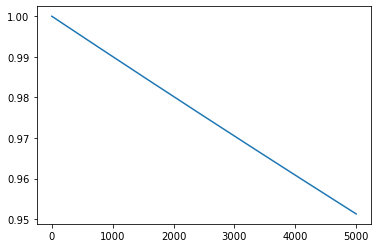

In [109]:
plt.plot(time, epsilon)
plt.show()